In [1]:
import os
import natsort
from glob import glob
import pandas as pd
import numpy as np
import warnings
import io
import csv
import statistics
from pandas.core.frame import DataFrame
from scipy import io
from scipy.interpolate import splrep, splev
from scipy.stats import skew, kurtosis
from scipy import signal, fftpack
from sys import platform
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from lightgbm import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import *
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import math
import shap
import tensorflow as tf
import keras.backend as K 
from keras.layers import Dense, LSTM, GRU, SimpleRNN, RNN, Conv1D, Conv2D, Conv3D
from keras.layers import Input, Dropout, Flatten, BatchNormalization, LayerNormalization
from keras.layers import Embedding, Bidirectional
from keras.models import Sequential
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.constraints import MaxNorm
from keras.metrics import mean_absolute_percentage_error, RootMeanSquaredError
from keras.utils import plot_model
from keras.utils import model_to_dot

In [2]:
data_12800 = 'all_condition_stat_12800_filtered_max.csv'

In [3]:
data = pd.read_csv("./data/"+data_12800)
data

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed,Milling_Type
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300,down
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300,down
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300,down
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300,down
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,583.231211,3.575957,2.872385,2.802993,0.030818,24.041893,1.967909,5.678236,50.651660,41.327268,...,0.027200,-4.553875,4.258986,-0.195173,-0.025525,4,6.0,5000,450,up
3562,580.421189,3.143293,2.918746,2.238513,0.010163,23.272022,2.152586,6.442916,54.398373,43.387011,...,0.032404,-4.331138,3.992545,-0.186024,0.438358,4,6.0,5000,450,up
3563,604.216465,3.415435,2.680779,2.670480,0.002692,20.326331,1.737523,4.027836,53.139158,42.652204,...,-0.054790,-4.232807,4.408266,0.124733,-0.246908,4,6.0,5000,500,up
3564,602.037207,3.527300,2.891382,2.728853,0.015913,22.578368,1.957310,5.237861,53.070980,42.595514,...,-0.041764,-4.056287,4.755409,0.231296,-0.233711,4,6.0,5000,500,up


In [4]:
groups_type = data.groupby('Milling_Type')

down = groups_type.get_group('down')
down = down.reset_index(drop=True)

up = groups_type.get_group('up')
up = up.reset_index(drop=True)

# ***절삭깊이(Ap) - 다운밀링***

In [5]:
groups_ap = down.groupby('Ap')

In [6]:
ap_100 = groups_ap.get_group(1)
ap_100 = ap_100.reset_index(drop=True)
ap_100 = ap_100.drop(['Milling_Type'], axis=1)

ap_225 = groups_ap.get_group(2.25)
ap_225 = ap_225.reset_index(drop=True)
ap_225 = ap_225.drop(['Milling_Type'], axis=1)

ap_350 = groups_ap.get_group(3.5)
ap_350 = ap_350.reset_index(drop=True)
ap_350 = ap_350.drop(['Milling_Type'], axis=1)

ap_475 = groups_ap.get_group(4.75)
ap_475 = ap_475.reset_index(drop=True)
ap_475 = ap_475.drop(['Milling_Type'], axis=1)

ap_600 = groups_ap.get_group(6)
ap_600 = ap_600.reset_index(drop=True)
ap_600 = ap_600.drop(['Milling_Type'], axis=1)

In [7]:
ap_100

,RMS_CF_max,RMS_ACC_mean,RMS_ACC_std,RMS_ACC_median,RMS_ACC_min,RMS_ACC_max,RMS_ACC_skew,RMS_ACC_kurt,RMS_SPINDLE_V_mean,RMS_SPINDLE_V_std,...,SOUND_std,SOUND_median,SOUND_min,SOUND_max,SOUND_skew,SOUND_kurt,Ae,Ap,rpm,feed
0,68.163329,0.245427,0.271667,0.157905,0.001419,1.941071,2.825262,9.431775,74.608110,51.078552,...,0.145759,0.004706,-0.518381,0.492327,-0.101884,-0.084553,1,1.0,3000,300
1,67.874475,0.228561,0.256883,0.148731,0.000569,1.841374,3.073146,11.427321,73.197898,50.566549,...,0.142357,0.002291,-0.450551,0.498996,0.080216,-0.211029,1,1.0,3000,300
2,69.284793,0.231981,0.257158,0.153119,0.001430,1.935348,3.078326,11.477200,73.187227,50.567539,...,0.179684,0.002904,-0.709097,0.817550,-0.029898,0.266027,1,1.0,3000,300
3,69.473656,0.231002,0.255456,0.152957,0.001585,1.852523,3.057163,11.327835,73.155798,50.966931,...,0.148164,0.002248,-0.496731,0.509122,0.051436,-0.170695,1,1.0,3000,300
4,68.602052,0.228895,0.255323,0.150978,0.001553,1.942390,3.071897,11.429692,74.284101,51.089732,...,0.145978,-0.004157,-0.467897,0.517642,0.060738,-0.246327,1,1.0,3000,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,116.668707,0.441503,0.411593,0.317832,0.000201,2.582805,2.202807,5.379083,61.265830,46.228615,...,0.213886,0.009329,-0.682848,0.695585,-0.069656,-0.371314,4,1.0,5000,450
354,117.062818,0.403437,0.396084,0.280506,0.001230,2.805259,2.233079,5.757211,61.831688,46.547247,...,0.188259,-0.000822,-0.654566,0.606853,-0.028219,-0.104033,4,1.0,5000,450
355,123.457841,0.464036,0.436420,0.330714,0.000145,2.670137,2.202004,5.329486,61.226607,46.256331,...,0.212118,0.011511,-0.795927,0.651133,-0.220019,-0.218731,4,1.0,5000,500
356,124.516608,0.466041,0.435674,0.331824,0.002422,2.725365,2.200997,5.335148,61.269453,46.301577,...,0.219705,0.005106,-0.634682,0.782625,-0.065623,-0.224743,4,1.0,5000,500


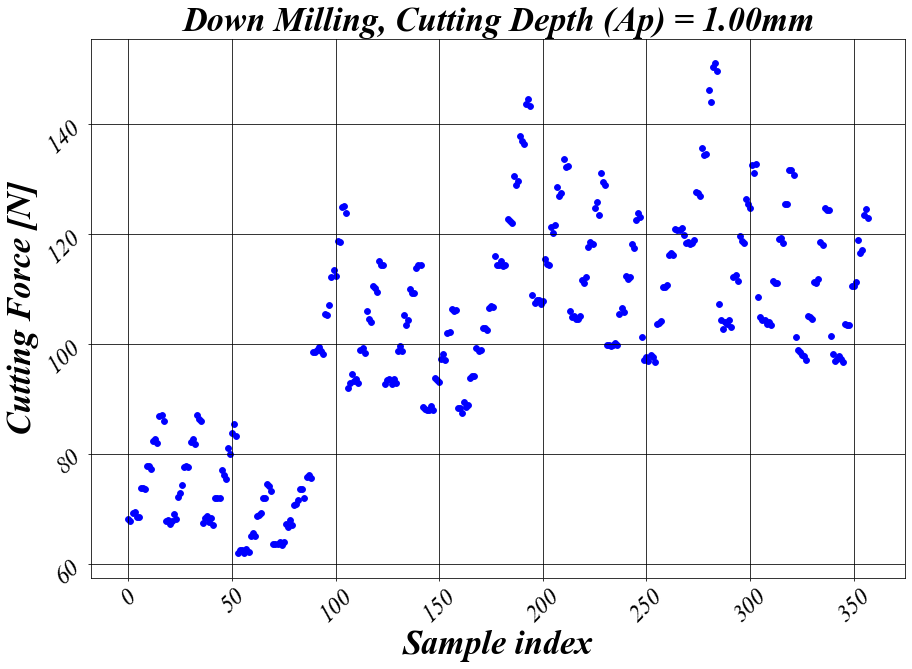

In [8]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 1.00mm',**tfont)
plt.scatter(range(0, len(ap_100['RMS_CF_max'])), ap_100['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((50,350))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 1.00mm.png")

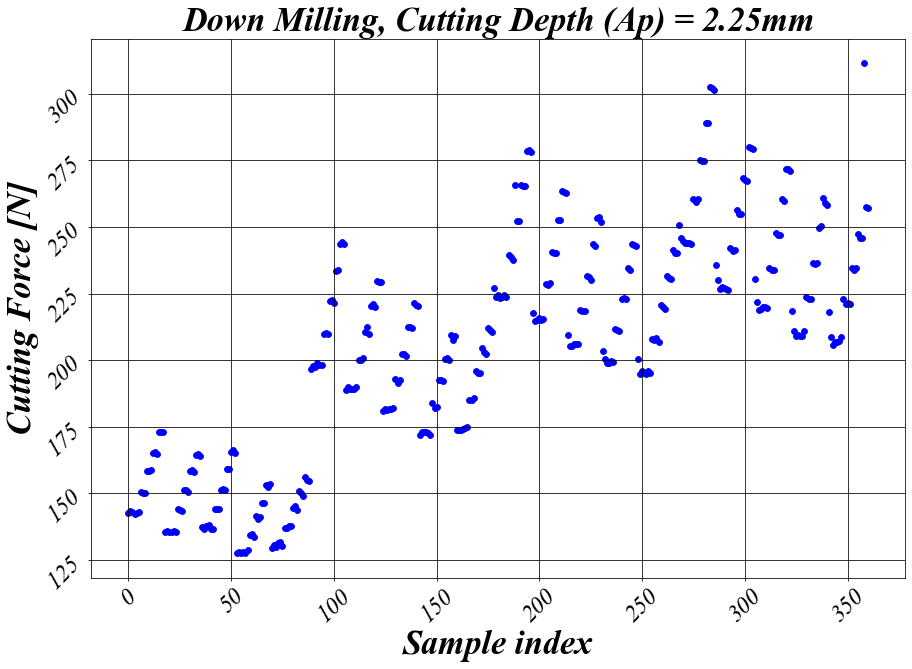

In [9]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 2.25mm',**tfont)
plt.scatter(range(0, len(ap_225['RMS_CF_max'])), ap_225['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((0,300))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 2.25mm.png")

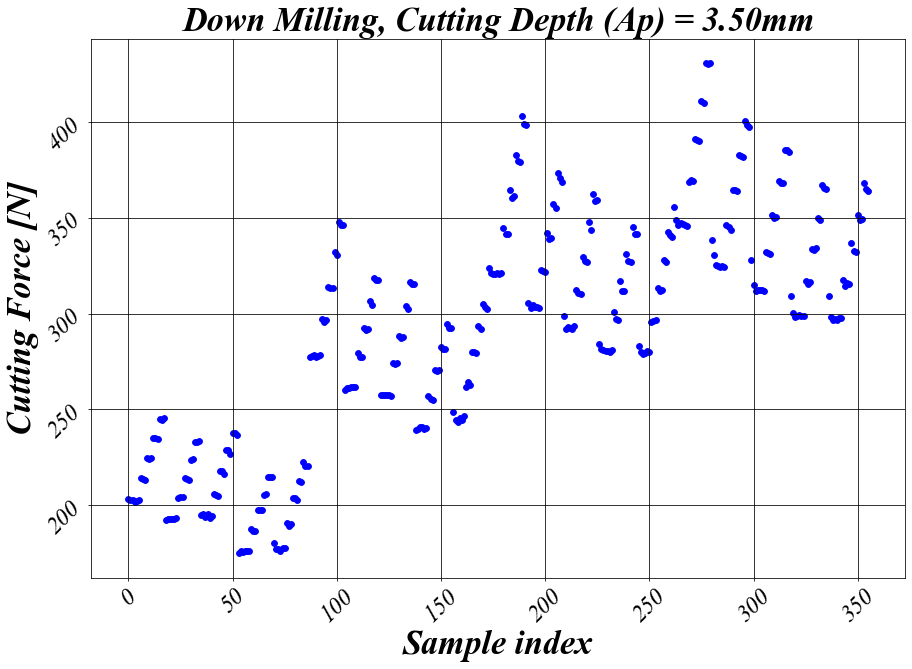

In [10]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 3.50mm',**tfont)
plt.scatter(range(0, len(ap_350['RMS_CF_max'])), ap_350['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((0,300))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 3.50mm.png")

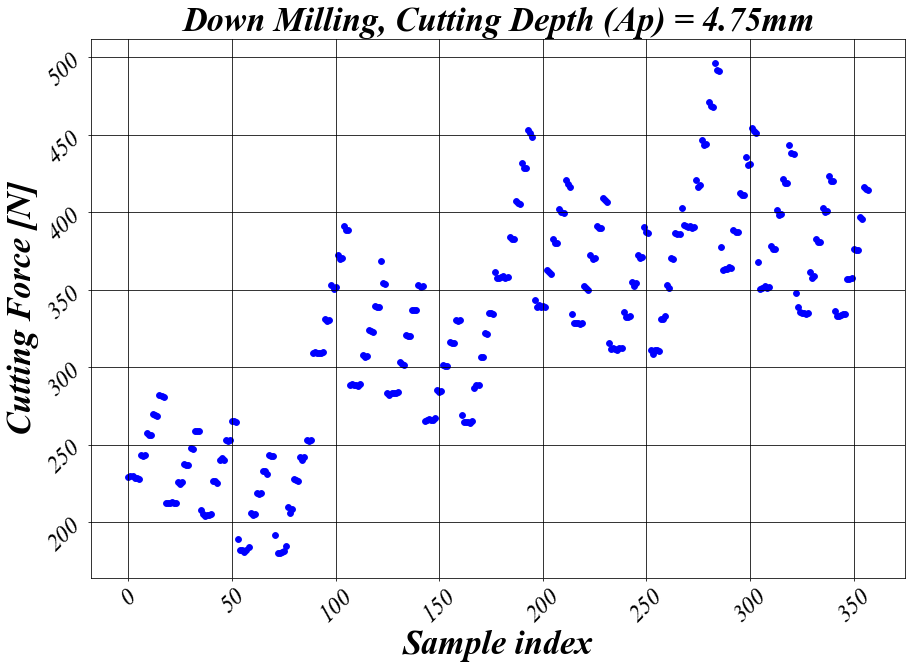

In [11]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 4.75mm',**tfont)
plt.scatter(range(0, len(ap_475['RMS_CF_max'])), ap_475['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((0,300))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 4.75mm.png")

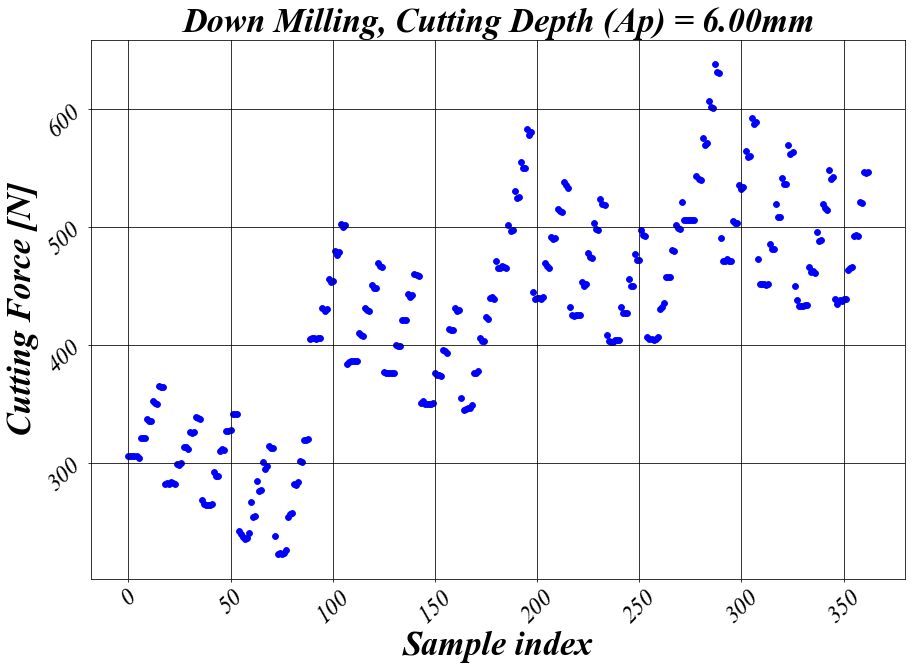

In [12]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Down Milling, Cutting Depth (Ap) = 6.00mm',**tfont)
plt.scatter(range(0, len(ap_600['RMS_CF_max'])), ap_600['RMS_CF_max'], label='RMS Fxyz MAX', color = 'blue')
#plt.ylim((0,300))
#plt.scatter(range(0, len(LGBM_test_pred)), LGBM_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid(color = 'black')
#plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Down Milling, Cutting Depth (Ap) = 6.00mm.png")

# ***Ap 1 test***

In [13]:
train = pd.concat([ap_225, ap_350, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [14]:
X_test = ap_100.iloc[: , 1:]
y_test = ap_100['RMS_CF_max']

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [16]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:323.94375	validation_0-mape:0.98820	validation_1-rmse:100.94644	validation_1-mape:0.97322
[1]	validation_0-rmse:320.76957	validation_0-mape:0.97830	validation_1-rmse:98.90383	validation_1-mape:0.95182
[2]	validation_0-rmse:317.62698	validation_0-mape:0.96852	validation_1-rmse:96.88317	validation_1-mape:0.93063
[3]	validation_0-rmse:314.51591	validation_0-mape:0.95883	validation_1-rmse:94.88432	validation_1-mape:0.90965
[4]	validation_0-rmse:311.43580	validation_0-mape:0.94924	validation_1-rmse:92.90713	validation_1-mape:0.88889
[5]	validation_0-rmse:308.38647	validation_0-mape:0.93974	validation_1-rmse:90.95148	validation_1-mape:0.86832
[6]	validation_0-rmse:305.36979	validation_0-mape:0.93030	validation_1-rmse:89.01371	validation_1-mape:0.84794
[7]	validation_0-rmse:302.37864	validation_0-mape:0.92097	validation_1-rmse:87.10076	validation_1-mape:0.82778
[8]	validation_0-rmse:299.41972	validation_0-mape:0.91176	validation_1-rmse:85.20552	validation_1-mape:0.80780


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[19]	validation_0-rmse:268.74134	validation_0-mape:0.81615	validation_1-rmse:65.86862	validation_1-mape:0.60254
[20]	validation_0-rmse:266.11659	validation_0-mape:0.80794	validation_1-rmse:64.27863	validation_1-mape:0.58541
[21]	validation_0-rmse:263.51713	validation_0-mape:0.79986	validation_1-rmse:62.61996	validation_1-mape:0.56765
[22]	validation_0-rmse:260.94381	validation_0-mape:0.79185	validation_1-rmse:60.98086	validation_1-mape:0.55006
[23]	validation_0-rmse:258.39568	validation_0-mape:0.78390	validation_1-rmse:59.45141	validation_1-mape:0.53344
[24]	validation_0-rmse:255.87330	validation_0-mape:0.77605	validation_1-rmse:57.85523	validation_1-mape:0.51622
[25]	validation_0-rmse:253.37584	validation_0-mape:0.76826	validation_1-rmse:56.36616	validation_1-mape:0.49994
[26]	validation_0-rmse:250.90474	validation_0-mape:0.76054	validation_1-rmse:54.89804	validation_1-mape:0.48384
[27]	validation_0-rmse:248.45661	validation_0-mape:0.75293	validation_1-rmse:53.36538	validation_1-mape:

[93]	validation_0-rmse:130.52344	validation_0-mape:0.38814	validation_1-rmse:31.96704	validation_1-mape:0.32202
[94]	validation_0-rmse:129.26425	validation_0-mape:0.38427	validation_1-rmse:32.53204	validation_1-mape:0.32892
[95]	validation_0-rmse:128.02069	validation_0-mape:0.38043	validation_1-rmse:33.25847	validation_1-mape:0.33729
[96]	validation_0-rmse:126.78926	validation_0-mape:0.37663	validation_1-rmse:33.83957	validation_1-mape:0.34391
[97]	validation_0-rmse:125.56726	validation_0-mape:0.37288	validation_1-rmse:34.38737	validation_1-mape:0.35052
[98]	validation_0-rmse:124.35728	validation_0-mape:0.36917	validation_1-rmse:34.95489	validation_1-mape:0.35730
[99]	validation_0-rmse:123.16230	validation_0-mape:0.36548	validation_1-rmse:35.67641	validation_1-mape:0.36546
[100]	validation_0-rmse:121.97895	validation_0-mape:0.36183	validation_1-rmse:36.21220	validation_1-mape:0.37146
[101]	validation_0-rmse:120.80457	validation_0-mape:0.35823	validation_1-rmse:36.75812	validation_1-map

[166]	validation_0-rmse:64.76939	validation_0-mape:0.18715	validation_1-rmse:65.79303	validation_1-mape:0.69103
[167]	validation_0-rmse:64.15649	validation_0-mape:0.18528	validation_1-rmse:66.07464	validation_1-mape:0.69394
[168]	validation_0-rmse:63.55017	validation_0-mape:0.18344	validation_1-rmse:66.34811	validation_1-mape:0.69679
[169]	validation_0-rmse:62.95111	validation_0-mape:0.18162	validation_1-rmse:66.65550	validation_1-mape:0.70003
[170]	validation_0-rmse:62.35681	validation_0-mape:0.17982	validation_1-rmse:66.92373	validation_1-mape:0.70283
[171]	validation_0-rmse:61.76795	validation_0-mape:0.17805	validation_1-rmse:67.24851	validation_1-mape:0.70623
[172]	validation_0-rmse:61.18612	validation_0-mape:0.17629	validation_1-rmse:67.51382	validation_1-mape:0.70899
[173]	validation_0-rmse:60.60884	validation_0-mape:0.17452	validation_1-rmse:67.77732	validation_1-mape:0.71170
[174]	validation_0-rmse:60.03858	validation_0-mape:0.17279	validation_1-rmse:68.12512	validation_1-mape:

[240]	validation_0-rmse:32.48204	validation_0-mape:0.08953	validation_1-rmse:82.62287	validation_1-mape:0.86626
[241]	validation_0-rmse:32.18746	validation_0-mape:0.08865	validation_1-rmse:82.80544	validation_1-mape:0.86815
[242]	validation_0-rmse:31.89556	validation_0-mape:0.08776	validation_1-rmse:82.99054	validation_1-mape:0.87010
[243]	validation_0-rmse:31.60657	validation_0-mape:0.08690	validation_1-rmse:83.17025	validation_1-mape:0.87198
[244]	validation_0-rmse:31.32071	validation_0-mape:0.08604	validation_1-rmse:83.34572	validation_1-mape:0.87379
[245]	validation_0-rmse:31.03775	validation_0-mape:0.08518	validation_1-rmse:83.46789	validation_1-mape:0.87505
[246]	validation_0-rmse:30.75667	validation_0-mape:0.08434	validation_1-rmse:83.59003	validation_1-mape:0.87629
[247]	validation_0-rmse:30.47910	validation_0-mape:0.08351	validation_1-rmse:83.74316	validation_1-mape:0.87786
[248]	validation_0-rmse:30.20423	validation_0-mape:0.08268	validation_1-rmse:83.92400	validation_1-mape:

[314]	validation_0-rmse:16.86789	validation_0-mape:0.04305	validation_1-rmse:91.38074	validation_1-mape:0.95663
[315]	validation_0-rmse:16.72494	validation_0-mape:0.04264	validation_1-rmse:91.46903	validation_1-mape:0.95754
[316]	validation_0-rmse:16.58416	validation_0-mape:0.04222	validation_1-rmse:91.55067	validation_1-mape:0.95839
[317]	validation_0-rmse:16.44489	validation_0-mape:0.04180	validation_1-rmse:91.63151	validation_1-mape:0.95924
[318]	validation_0-rmse:16.30702	validation_0-mape:0.04139	validation_1-rmse:91.71160	validation_1-mape:0.96007
[319]	validation_0-rmse:16.17011	validation_0-mape:0.04099	validation_1-rmse:91.78947	validation_1-mape:0.96088
[320]	validation_0-rmse:16.03515	validation_0-mape:0.04059	validation_1-rmse:91.86786	validation_1-mape:0.96170
[321]	validation_0-rmse:15.90237	validation_0-mape:0.04019	validation_1-rmse:91.97708	validation_1-mape:0.96281
[322]	validation_0-rmse:15.77019	validation_0-mape:0.03980	validation_1-rmse:92.06310	validation_1-mape:

[388]	validation_0-rmse:9.42445	validation_0-mape:0.02169	validation_1-rmse:96.09627	validation_1-mape:1.00501
[389]	validation_0-rmse:9.35825	validation_0-mape:0.02151	validation_1-rmse:96.13006	validation_1-mape:1.00536
[390]	validation_0-rmse:9.29061	validation_0-mape:0.02134	validation_1-rmse:96.17303	validation_1-mape:1.00579
[391]	validation_0-rmse:9.22569	validation_0-mape:0.02116	validation_1-rmse:96.20901	validation_1-mape:1.00617
[392]	validation_0-rmse:9.15929	validation_0-mape:0.02099	validation_1-rmse:96.25129	validation_1-mape:1.00660
[393]	validation_0-rmse:9.09512	validation_0-mape:0.02083	validation_1-rmse:96.29712	validation_1-mape:1.00706
[394]	validation_0-rmse:9.03074	validation_0-mape:0.02066	validation_1-rmse:96.34190	validation_1-mape:1.00750
[395]	validation_0-rmse:8.96772	validation_0-mape:0.02050	validation_1-rmse:96.38901	validation_1-mape:1.00797
[396]	validation_0-rmse:8.90521	validation_0-mape:0.02034	validation_1-rmse:96.45026	validation_1-mape:1.00858
[

[462]	validation_0-rmse:5.91058	validation_0-mape:0.01321	validation_1-rmse:98.64023	validation_1-mape:1.03037
[463]	validation_0-rmse:5.87817	validation_0-mape:0.01314	validation_1-rmse:98.68067	validation_1-mape:1.03077
[464]	validation_0-rmse:5.84527	validation_0-mape:0.01307	validation_1-rmse:98.71128	validation_1-mape:1.03108
[465]	validation_0-rmse:5.81289	validation_0-mape:0.01300	validation_1-rmse:98.73469	validation_1-mape:1.03131
[466]	validation_0-rmse:5.78124	validation_0-mape:0.01293	validation_1-rmse:98.76330	validation_1-mape:1.03160
[467]	validation_0-rmse:5.74993	validation_0-mape:0.01287	validation_1-rmse:98.78689	validation_1-mape:1.03184
[468]	validation_0-rmse:5.71975	validation_0-mape:0.01280	validation_1-rmse:98.79435	validation_1-mape:1.03191
[469]	validation_0-rmse:5.69039	validation_0-mape:0.01273	validation_1-rmse:98.81453	validation_1-mape:1.03211
[470]	validation_0-rmse:5.66152	validation_0-mape:0.01267	validation_1-rmse:98.84141	validation_1-mape:1.03238
[

[536]	validation_0-rmse:4.23118	validation_0-mape:0.00973	validation_1-rmse:100.11645	validation_1-mape:1.04506
[537]	validation_0-rmse:4.21537	validation_0-mape:0.00970	validation_1-rmse:100.12700	validation_1-mape:1.04517
[538]	validation_0-rmse:4.19992	validation_0-mape:0.00967	validation_1-rmse:100.14660	validation_1-mape:1.04536
[539]	validation_0-rmse:4.18427	validation_0-mape:0.00965	validation_1-rmse:100.15239	validation_1-mape:1.04541
[540]	validation_0-rmse:4.16702	validation_0-mape:0.00961	validation_1-rmse:100.18220	validation_1-mape:1.04570
[541]	validation_0-rmse:4.15193	validation_0-mape:0.00958	validation_1-rmse:100.19215	validation_1-mape:1.04579
[542]	validation_0-rmse:4.13707	validation_0-mape:0.00956	validation_1-rmse:100.20880	validation_1-mape:1.04596
[543]	validation_0-rmse:4.12198	validation_0-mape:0.00953	validation_1-rmse:100.22996	validation_1-mape:1.04617
[544]	validation_0-rmse:4.10712	validation_0-mape:0.00950	validation_1-rmse:100.25092	validation_1-mape:

[610]	validation_0-rmse:3.37252	validation_0-mape:0.00810	validation_1-rmse:100.94527	validation_1-mape:1.05331
[611]	validation_0-rmse:3.36527	validation_0-mape:0.00808	validation_1-rmse:100.95424	validation_1-mape:1.05340
[612]	validation_0-rmse:3.35883	validation_0-mape:0.00807	validation_1-rmse:100.95466	validation_1-mape:1.05341
[613]	validation_0-rmse:3.35017	validation_0-mape:0.00806	validation_1-rmse:100.95795	validation_1-mape:1.05344
[614]	validation_0-rmse:3.34483	validation_0-mape:0.00805	validation_1-rmse:100.95841	validation_1-mape:1.05344
[615]	validation_0-rmse:3.33490	validation_0-mape:0.00803	validation_1-rmse:100.96533	validation_1-mape:1.05350
[616]	validation_0-rmse:3.32769	validation_0-mape:0.00801	validation_1-rmse:100.97321	validation_1-mape:1.05358
[617]	validation_0-rmse:3.32252	validation_0-mape:0.00800	validation_1-rmse:100.97359	validation_1-mape:1.05358
[618]	validation_0-rmse:3.31285	validation_0-mape:0.00799	validation_1-rmse:100.98494	validation_1-mape:

[684]	validation_0-rmse:2.91626	validation_0-mape:0.00719	validation_1-rmse:101.02758	validation_1-mape:1.05370
[685]	validation_0-rmse:2.91047	validation_0-mape:0.00718	validation_1-rmse:101.01233	validation_1-mape:1.05353
[686]	validation_0-rmse:2.90501	validation_0-mape:0.00717	validation_1-rmse:101.01431	validation_1-mape:1.05355
[687]	validation_0-rmse:2.90160	validation_0-mape:0.00716	validation_1-rmse:101.01470	validation_1-mape:1.05355
[688]	validation_0-rmse:2.89627	validation_0-mape:0.00714	validation_1-rmse:101.02341	validation_1-mape:1.05365
[689]	validation_0-rmse:2.89201	validation_0-mape:0.00714	validation_1-rmse:101.00944	validation_1-mape:1.05349
[690]	validation_0-rmse:2.88669	validation_0-mape:0.00713	validation_1-rmse:101.01131	validation_1-mape:1.05350
[691]	validation_0-rmse:2.88149	validation_0-mape:0.00711	validation_1-rmse:101.01970	validation_1-mape:1.05359
[692]	validation_0-rmse:2.87674	validation_0-mape:0.00710	validation_1-rmse:101.02655	validation_1-mape:

[758]	validation_0-rmse:2.60752	validation_0-mape:0.00651	validation_1-rmse:100.91970	validation_1-mape:1.05219
[759]	validation_0-rmse:2.60482	validation_0-mape:0.00650	validation_1-rmse:100.90668	validation_1-mape:1.05204
[760]	validation_0-rmse:2.60118	validation_0-mape:0.00649	validation_1-rmse:100.90954	validation_1-mape:1.05207
[761]	validation_0-rmse:2.59932	validation_0-mape:0.00649	validation_1-rmse:100.91248	validation_1-mape:1.05210
[762]	validation_0-rmse:2.59374	validation_0-mape:0.00647	validation_1-rmse:100.90809	validation_1-mape:1.05205
[763]	validation_0-rmse:2.58856	validation_0-mape:0.00646	validation_1-rmse:100.90729	validation_1-mape:1.05204
[764]	validation_0-rmse:2.58462	validation_0-mape:0.00645	validation_1-rmse:100.89770	validation_1-mape:1.05193
[765]	validation_0-rmse:2.58107	validation_0-mape:0.00644	validation_1-rmse:100.90056	validation_1-mape:1.05196
[766]	validation_0-rmse:2.57727	validation_0-mape:0.00643	validation_1-rmse:100.90079	validation_1-mape:

[832]	validation_0-rmse:2.35622	validation_0-mape:0.00590	validation_1-rmse:100.96863	validation_1-mape:1.05247
[833]	validation_0-rmse:2.35329	validation_0-mape:0.00590	validation_1-rmse:100.97161	validation_1-mape:1.05250
[834]	validation_0-rmse:2.35114	validation_0-mape:0.00589	validation_1-rmse:100.97824	validation_1-mape:1.05256
[835]	validation_0-rmse:2.34917	validation_0-mape:0.00588	validation_1-rmse:100.97480	validation_1-mape:1.05253
[836]	validation_0-rmse:2.34512	validation_0-mape:0.00588	validation_1-rmse:100.97237	validation_1-mape:1.05250
[837]	validation_0-rmse:2.34221	validation_0-mape:0.00587	validation_1-rmse:100.97324	validation_1-mape:1.05251
[838]	validation_0-rmse:2.33880	validation_0-mape:0.00586	validation_1-rmse:100.97024	validation_1-mape:1.05248
[839]	validation_0-rmse:2.33663	validation_0-mape:0.00585	validation_1-rmse:100.97496	validation_1-mape:1.05252
[840]	validation_0-rmse:2.33396	validation_0-mape:0.00585	validation_1-rmse:100.97577	validation_1-mape:

[906]	validation_0-rmse:2.17364	validation_0-mape:0.00545	validation_1-rmse:100.97463	validation_1-mape:1.05248
[907]	validation_0-rmse:2.17213	validation_0-mape:0.00544	validation_1-rmse:100.97611	validation_1-mape:1.05249
[908]	validation_0-rmse:2.16915	validation_0-mape:0.00543	validation_1-rmse:100.97788	validation_1-mape:1.05251
[909]	validation_0-rmse:2.16733	validation_0-mape:0.00543	validation_1-rmse:100.97704	validation_1-mape:1.05250
[910]	validation_0-rmse:2.16558	validation_0-mape:0.00543	validation_1-rmse:100.97651	validation_1-mape:1.05249
[911]	validation_0-rmse:2.16318	validation_0-mape:0.00542	validation_1-rmse:100.97392	validation_1-mape:1.05247
[912]	validation_0-rmse:2.16146	validation_0-mape:0.00541	validation_1-rmse:100.97411	validation_1-mape:1.05247
[913]	validation_0-rmse:2.15968	validation_0-mape:0.00541	validation_1-rmse:100.97359	validation_1-mape:1.05247
[914]	validation_0-rmse:2.15814	validation_0-mape:0.00540	validation_1-rmse:100.97809	validation_1-mape:

[980]	validation_0-rmse:2.03458	validation_0-mape:0.00509	validation_1-rmse:100.96748	validation_1-mape:1.05240
[981]	validation_0-rmse:2.03343	validation_0-mape:0.00509	validation_1-rmse:100.96759	validation_1-mape:1.05240
[982]	validation_0-rmse:2.03142	validation_0-mape:0.00509	validation_1-rmse:100.96489	validation_1-mape:1.05238
[983]	validation_0-rmse:2.02995	validation_0-mape:0.00508	validation_1-rmse:100.96352	validation_1-mape:1.05236
[984]	validation_0-rmse:2.02885	validation_0-mape:0.00508	validation_1-rmse:100.96423	validation_1-mape:1.05237
[985]	validation_0-rmse:2.02692	validation_0-mape:0.00508	validation_1-rmse:100.96360	validation_1-mape:1.05237
[986]	validation_0-rmse:2.02529	validation_0-mape:0.00507	validation_1-rmse:100.96432	validation_1-mape:1.05237
[987]	validation_0-rmse:2.02388	validation_0-mape:0.00507	validation_1-rmse:100.96297	validation_1-mape:1.05236
[988]	validation_0-rmse:2.02211	validation_0-mape:0.00506	validation_1-rmse:100.96327	validation_1-mape:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [17]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 2.0071
Train MAPE: 0.5025
Test RMSE: 100.9650
Test MAPE: 105.2382


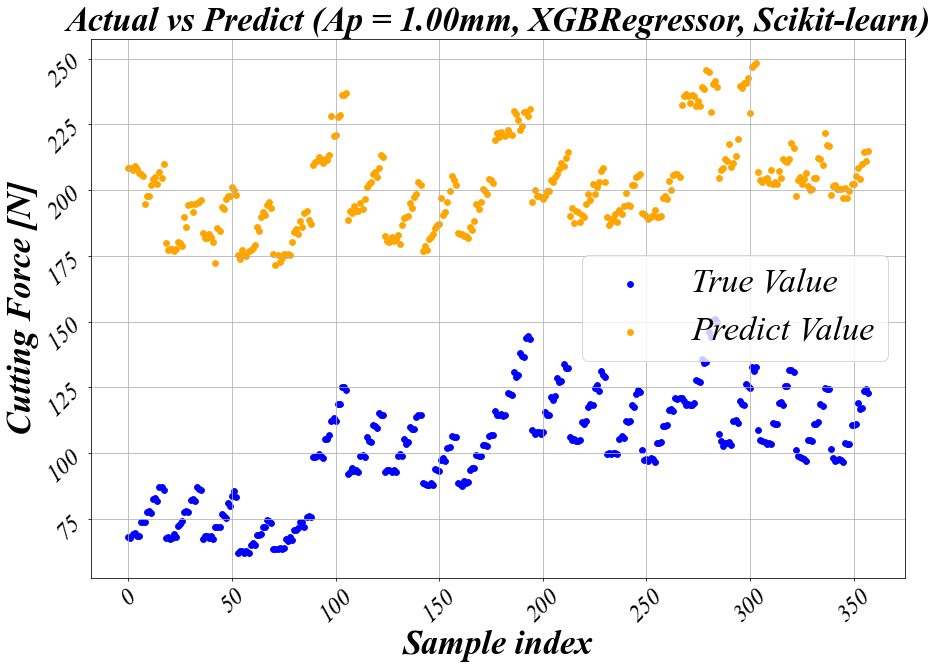

In [20]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 1.00mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

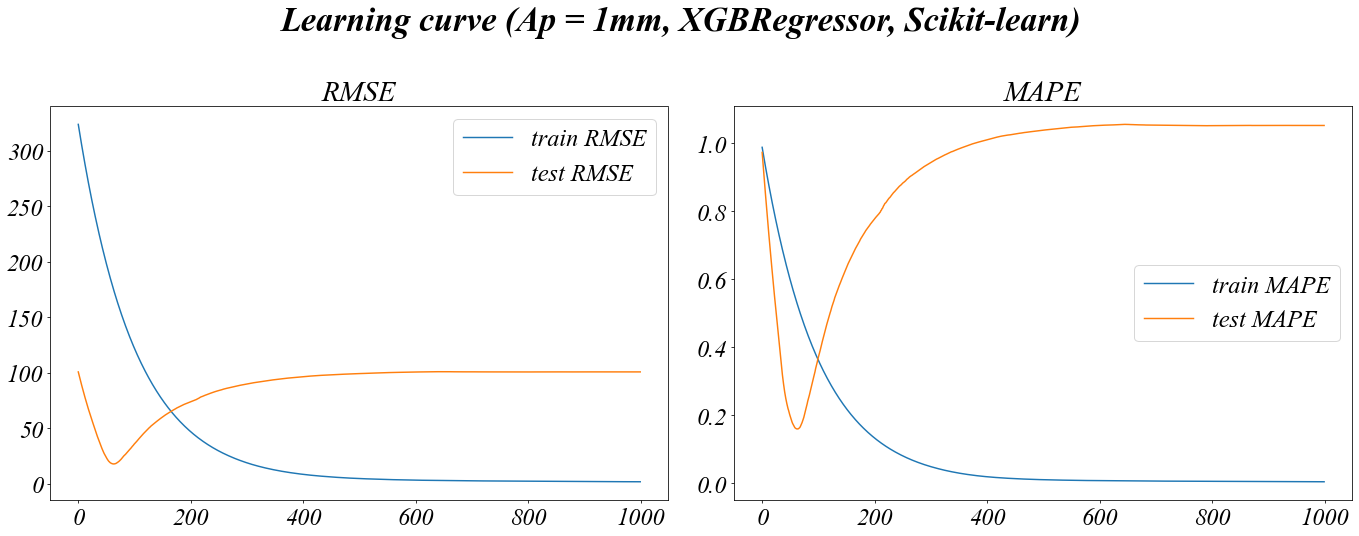

In [21]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 1mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 1mm_12800.png")

# ***Ap 2.25 test***

In [22]:
train = pd.concat([ap_100, ap_350, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [23]:
X_test = ap_225.iloc[: , 1:]
y_test = ap_225['RMS_CF_max']

In [24]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [25]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:311.48326	validation_0-mape:0.98755	validation_1-rmse:205.66658	validation_1-mape:0.98309
[1]	validation_0-rmse:308.42845	validation_0-mape:0.97766	validation_1-rmse:202.78458	validation_1-mape:0.96888
[2]	validation_0-rmse:305.40424	validation_0-mape:0.96787	validation_1-rmse:199.93356	validation_1-mape:0.95481
[3]	validation_0-rmse:302.41034	validation_0-mape:0.95817	validation_1-rmse:197.11328	validation_1-mape:0.94087
[4]	validation_0-rmse:299.44645	validation_0-mape:0.94857	validation_1-rmse:194.32350	validation_1-mape:0.92708
[5]	validation_0-rmse:296.51231	validation_0-mape:0.93905	validation_1-rmse:191.56375	validation_1-mape:0.91342
[6]	validation_0-rmse:293.60750	validation_0-mape:0.92964	validation_1-rmse:188.83424	validation_1-mape:0.89990
[7]	validation_0-rmse:290.73123	validation_0-mape:0.92031	validation_1-rmse:186.13723	validation_1-mape:0.88652
[8]	validation_0-rmse:287.88432	validation_0-mape:0.91110	validation_1-rmse:183.46685	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[19]	validation_0-rmse:258.38031	validation_0-mape:0.81560	validation_1-rmse:155.99643	validation_1-mape:0.73584
[20]	validation_0-rmse:255.85634	validation_0-mape:0.80743	validation_1-rmse:153.66421	validation_1-mape:0.72406
[21]	validation_0-rmse:253.35705	validation_0-mape:0.79937	validation_1-rmse:151.35740	validation_1-mape:0.71240
[22]	validation_0-rmse:250.88326	validation_0-mape:0.79138	validation_1-rmse:149.05762	validation_1-mape:0.70083
[23]	validation_0-rmse:248.43431	validation_0-mape:0.78345	validation_1-rmse:146.79899	validation_1-mape:0.68935
[24]	validation_0-rmse:246.00904	validation_0-mape:0.77563	validation_1-rmse:144.55449	validation_1-mape:0.67803
[25]	validation_0-rmse:243.60863	validation_0-mape:0.76788	validation_1-rmse:142.32978	validation_1-mape:0.66678
[26]	validation_0-rmse:241.23229	validation_0-mape:0.76019	validation_1-rmse:140.14990	validation_1-mape:0.65564
[27]	validation_0-rmse:238.87854	validation_0-mape:0.75260	validation_1-rmse:137.98108	validatio

[92]	validation_0-rmse:126.80350	validation_0-mape:0.39235	validation_1-rmse:50.18035	validation_1-mape:0.18549
[93]	validation_0-rmse:125.57891	validation_0-mape:0.38844	validation_1-rmse:49.49619	validation_1-mape:0.18165
[94]	validation_0-rmse:124.36691	validation_0-mape:0.38457	validation_1-rmse:48.83968	validation_1-mape:0.17795
[95]	validation_0-rmse:123.16757	validation_0-mape:0.38074	validation_1-rmse:48.20246	validation_1-mape:0.17432
[96]	validation_0-rmse:121.98203	validation_0-mape:0.37694	validation_1-rmse:47.46284	validation_1-mape:0.17031
[97]	validation_0-rmse:120.80563	validation_0-mape:0.37319	validation_1-rmse:46.80720	validation_1-mape:0.16677
[98]	validation_0-rmse:119.64115	validation_0-mape:0.36946	validation_1-rmse:46.20209	validation_1-mape:0.16335
[99]	validation_0-rmse:118.48894	validation_0-mape:0.36579	validation_1-rmse:45.49091	validation_1-mape:0.15938
[100]	validation_0-rmse:117.34710	validation_0-mape:0.36214	validation_1-rmse:44.91242	validation_1-mape

[165]	validation_0-rmse:62.86219	validation_0-mape:0.18911	validation_1-rmse:31.08776	validation_1-mape:0.13198
[166]	validation_0-rmse:62.26665	validation_0-mape:0.18723	validation_1-rmse:31.20225	validation_1-mape:0.13318
[167]	validation_0-rmse:61.67742	validation_0-mape:0.18537	validation_1-rmse:31.28433	validation_1-mape:0.13415
[168]	validation_0-rmse:61.09354	validation_0-mape:0.18353	validation_1-rmse:31.42201	validation_1-mape:0.13531
[169]	validation_0-rmse:60.51629	validation_0-mape:0.18171	validation_1-rmse:31.53276	validation_1-mape:0.13635
[170]	validation_0-rmse:59.94379	validation_0-mape:0.17990	validation_1-rmse:31.66120	validation_1-mape:0.13749
[171]	validation_0-rmse:59.37596	validation_0-mape:0.17812	validation_1-rmse:31.78005	validation_1-mape:0.13860
[172]	validation_0-rmse:58.81551	validation_0-mape:0.17635	validation_1-rmse:31.94570	validation_1-mape:0.13989
[173]	validation_0-rmse:58.25895	validation_0-mape:0.17461	validation_1-rmse:32.07232	validation_1-mape:

[239]	validation_0-rmse:31.51561	validation_0-mape:0.09046	validation_1-rmse:43.08780	validation_1-mape:0.20199
[240]	validation_0-rmse:31.23134	validation_0-mape:0.08957	validation_1-rmse:43.27357	validation_1-mape:0.20290
[241]	validation_0-rmse:30.94740	validation_0-mape:0.08868	validation_1-rmse:43.38568	validation_1-mape:0.20344
[242]	validation_0-rmse:30.66800	validation_0-mape:0.08781	validation_1-rmse:43.51139	validation_1-mape:0.20405
[243]	validation_0-rmse:30.39245	validation_0-mape:0.08693	validation_1-rmse:43.66446	validation_1-mape:0.20473
[244]	validation_0-rmse:30.11839	validation_0-mape:0.08607	validation_1-rmse:43.79408	validation_1-mape:0.20534
[245]	validation_0-rmse:29.84685	validation_0-mape:0.08522	validation_1-rmse:43.92363	validation_1-mape:0.20595
[246]	validation_0-rmse:29.57832	validation_0-mape:0.08438	validation_1-rmse:44.06007	validation_1-mape:0.20657
[247]	validation_0-rmse:29.31352	validation_0-mape:0.08354	validation_1-rmse:44.18844	validation_1-mape:

[313]	validation_0-rmse:16.36687	validation_0-mape:0.04356	validation_1-rmse:51.20916	validation_1-mape:0.24082
[314]	validation_0-rmse:16.22677	validation_0-mape:0.04313	validation_1-rmse:51.29434	validation_1-mape:0.24121
[315]	validation_0-rmse:16.09113	validation_0-mape:0.04271	validation_1-rmse:51.36607	validation_1-mape:0.24155
[316]	validation_0-rmse:15.95394	validation_0-mape:0.04230	validation_1-rmse:51.44894	validation_1-mape:0.24192
[317]	validation_0-rmse:15.81816	validation_0-mape:0.04189	validation_1-rmse:51.53250	validation_1-mape:0.24231
[318]	validation_0-rmse:15.68500	validation_0-mape:0.04149	validation_1-rmse:51.63422	validation_1-mape:0.24279
[319]	validation_0-rmse:15.55332	validation_0-mape:0.04108	validation_1-rmse:51.73781	validation_1-mape:0.24329
[320]	validation_0-rmse:15.42357	validation_0-mape:0.04069	validation_1-rmse:51.80867	validation_1-mape:0.24361
[321]	validation_0-rmse:15.29311	validation_0-mape:0.04030	validation_1-rmse:51.89102	validation_1-mape:

[387]	validation_0-rmse:9.04761	validation_0-mape:0.02177	validation_1-rmse:55.19639	validation_1-mape:0.25962
[388]	validation_0-rmse:8.98105	validation_0-mape:0.02158	validation_1-rmse:55.24116	validation_1-mape:0.25981
[389]	validation_0-rmse:8.91312	validation_0-mape:0.02139	validation_1-rmse:55.30829	validation_1-mape:0.26013
[390]	validation_0-rmse:8.84585	validation_0-mape:0.02119	validation_1-rmse:55.37423	validation_1-mape:0.26045
[391]	validation_0-rmse:8.77896	validation_0-mape:0.02100	validation_1-rmse:55.40152	validation_1-mape:0.26058
[392]	validation_0-rmse:8.71501	validation_0-mape:0.02082	validation_1-rmse:55.44422	validation_1-mape:0.26077
[393]	validation_0-rmse:8.64973	validation_0-mape:0.02064	validation_1-rmse:55.50858	validation_1-mape:0.26108
[394]	validation_0-rmse:8.58516	validation_0-mape:0.02045	validation_1-rmse:55.57234	validation_1-mape:0.26138
[395]	validation_0-rmse:8.52126	validation_0-mape:0.02027	validation_1-rmse:55.63595	validation_1-mape:0.26169
[

[461]	validation_0-rmse:5.45928	validation_0-mape:0.01241	validation_1-rmse:57.76129	validation_1-mape:0.27184
[462]	validation_0-rmse:5.42574	validation_0-mape:0.01233	validation_1-rmse:57.77418	validation_1-mape:0.27190
[463]	validation_0-rmse:5.39315	validation_0-mape:0.01226	validation_1-rmse:57.79698	validation_1-mape:0.27200
[464]	validation_0-rmse:5.36122	validation_0-mape:0.01219	validation_1-rmse:57.82543	validation_1-mape:0.27214
[465]	validation_0-rmse:5.32817	validation_0-mape:0.01211	validation_1-rmse:57.86364	validation_1-mape:0.27232
[466]	validation_0-rmse:5.29811	validation_0-mape:0.01204	validation_1-rmse:57.88302	validation_1-mape:0.27241
[467]	validation_0-rmse:5.26621	validation_0-mape:0.01197	validation_1-rmse:57.90521	validation_1-mape:0.27251
[468]	validation_0-rmse:5.23524	validation_0-mape:0.01190	validation_1-rmse:57.92842	validation_1-mape:0.27262
[469]	validation_0-rmse:5.20572	validation_0-mape:0.01183	validation_1-rmse:57.94927	validation_1-mape:0.27273
[

[535]	validation_0-rmse:3.71848	validation_0-mape:0.00869	validation_1-rmse:59.31058	validation_1-mape:0.27940
[536]	validation_0-rmse:3.70390	validation_0-mape:0.00866	validation_1-rmse:59.31646	validation_1-mape:0.27943
[537]	validation_0-rmse:3.68619	validation_0-mape:0.00863	validation_1-rmse:59.32010	validation_1-mape:0.27945
[538]	validation_0-rmse:3.67201	validation_0-mape:0.00860	validation_1-rmse:59.32590	validation_1-mape:0.27948
[539]	validation_0-rmse:3.65700	validation_0-mape:0.00857	validation_1-rmse:59.33295	validation_1-mape:0.27951
[540]	validation_0-rmse:3.64186	validation_0-mape:0.00855	validation_1-rmse:59.35562	validation_1-mape:0.27962
[541]	validation_0-rmse:3.62820	validation_0-mape:0.00852	validation_1-rmse:59.35999	validation_1-mape:0.27965
[542]	validation_0-rmse:3.61356	validation_0-mape:0.00850	validation_1-rmse:59.35559	validation_1-mape:0.27962
[543]	validation_0-rmse:3.59990	validation_0-mape:0.00847	validation_1-rmse:59.36218	validation_1-mape:0.27965
[

[609]	validation_0-rmse:2.89508	validation_0-mape:0.00724	validation_1-rmse:59.63881	validation_1-mape:0.28097
[610]	validation_0-rmse:2.88790	validation_0-mape:0.00723	validation_1-rmse:59.64742	validation_1-mape:0.28101
[611]	validation_0-rmse:2.87785	validation_0-mape:0.00721	validation_1-rmse:59.65164	validation_1-mape:0.28103
[612]	validation_0-rmse:2.87091	validation_0-mape:0.00719	validation_1-rmse:59.66110	validation_1-mape:0.28108
[613]	validation_0-rmse:2.86124	validation_0-mape:0.00717	validation_1-rmse:59.66629	validation_1-mape:0.28111
[614]	validation_0-rmse:2.85375	validation_0-mape:0.00716	validation_1-rmse:59.67001	validation_1-mape:0.28112
[615]	validation_0-rmse:2.84464	validation_0-mape:0.00714	validation_1-rmse:59.67472	validation_1-mape:0.28115
[616]	validation_0-rmse:2.83746	validation_0-mape:0.00713	validation_1-rmse:59.67526	validation_1-mape:0.28114
[617]	validation_0-rmse:2.82848	validation_0-mape:0.00711	validation_1-rmse:59.67986	validation_1-mape:0.28116
[

[683]	validation_0-rmse:2.40959	validation_0-mape:0.00628	validation_1-rmse:60.09340	validation_1-mape:0.28320
[684]	validation_0-rmse:2.40618	validation_0-mape:0.00628	validation_1-rmse:60.09883	validation_1-mape:0.28323
[685]	validation_0-rmse:2.39926	validation_0-mape:0.00626	validation_1-rmse:60.11184	validation_1-mape:0.28328
[686]	validation_0-rmse:2.39561	validation_0-mape:0.00625	validation_1-rmse:60.11638	validation_1-mape:0.28331
[687]	validation_0-rmse:2.39062	validation_0-mape:0.00625	validation_1-rmse:60.12050	validation_1-mape:0.28333
[688]	validation_0-rmse:2.38462	validation_0-mape:0.00624	validation_1-rmse:60.12312	validation_1-mape:0.28334
[689]	validation_0-rmse:2.38100	validation_0-mape:0.00623	validation_1-rmse:60.12870	validation_1-mape:0.28336
[690]	validation_0-rmse:2.37626	validation_0-mape:0.00622	validation_1-rmse:60.12844	validation_1-mape:0.28337
[691]	validation_0-rmse:2.37044	validation_0-mape:0.00621	validation_1-rmse:60.13101	validation_1-mape:0.28338
[

[757]	validation_0-rmse:2.08170	validation_0-mape:0.00564	validation_1-rmse:60.31547	validation_1-mape:0.28425
[758]	validation_0-rmse:2.07553	validation_0-mape:0.00563	validation_1-rmse:60.31335	validation_1-mape:0.28424
[759]	validation_0-rmse:2.07104	validation_0-mape:0.00563	validation_1-rmse:60.31460	validation_1-mape:0.28424
[760]	validation_0-rmse:2.06822	validation_0-mape:0.00562	validation_1-rmse:60.31316	validation_1-mape:0.28423
[761]	validation_0-rmse:2.06370	validation_0-mape:0.00561	validation_1-rmse:60.31380	validation_1-mape:0.28423
[762]	validation_0-rmse:2.05975	validation_0-mape:0.00560	validation_1-rmse:60.31874	validation_1-mape:0.28426
[763]	validation_0-rmse:2.05717	validation_0-mape:0.00560	validation_1-rmse:60.32094	validation_1-mape:0.28427
[764]	validation_0-rmse:2.05228	validation_0-mape:0.00559	validation_1-rmse:60.32098	validation_1-mape:0.28427
[765]	validation_0-rmse:2.04992	validation_0-mape:0.00558	validation_1-rmse:60.32151	validation_1-mape:0.28427
[

[831]	validation_0-rmse:1.83546	validation_0-mape:0.00513	validation_1-rmse:60.41018	validation_1-mape:0.28459
[832]	validation_0-rmse:1.83388	validation_0-mape:0.00513	validation_1-rmse:60.41078	validation_1-mape:0.28460
[833]	validation_0-rmse:1.83234	validation_0-mape:0.00512	validation_1-rmse:60.40624	validation_1-mape:0.28457
[834]	validation_0-rmse:1.83000	validation_0-mape:0.00512	validation_1-rmse:60.40812	validation_1-mape:0.28458
[835]	validation_0-rmse:1.82832	validation_0-mape:0.00511	validation_1-rmse:60.41016	validation_1-mape:0.28459
[836]	validation_0-rmse:1.82719	validation_0-mape:0.00511	validation_1-rmse:60.41235	validation_1-mape:0.28460
[837]	validation_0-rmse:1.82626	validation_0-mape:0.00511	validation_1-rmse:60.40945	validation_1-mape:0.28459
[838]	validation_0-rmse:1.82367	validation_0-mape:0.00510	validation_1-rmse:60.41177	validation_1-mape:0.28460
[839]	validation_0-rmse:1.82266	validation_0-mape:0.00510	validation_1-rmse:60.40914	validation_1-mape:0.28458
[

[905]	validation_0-rmse:1.69446	validation_0-mape:0.00483	validation_1-rmse:60.38910	validation_1-mape:0.28442
[906]	validation_0-rmse:1.69319	validation_0-mape:0.00483	validation_1-rmse:60.38929	validation_1-mape:0.28442
[907]	validation_0-rmse:1.69229	validation_0-mape:0.00482	validation_1-rmse:60.38808	validation_1-mape:0.28442
[908]	validation_0-rmse:1.69105	validation_0-mape:0.00482	validation_1-rmse:60.38566	validation_1-mape:0.28440
[909]	validation_0-rmse:1.68851	validation_0-mape:0.00482	validation_1-rmse:60.38601	validation_1-mape:0.28440
[910]	validation_0-rmse:1.68726	validation_0-mape:0.00481	validation_1-rmse:60.38650	validation_1-mape:0.28441
[911]	validation_0-rmse:1.68632	validation_0-mape:0.00481	validation_1-rmse:60.38709	validation_1-mape:0.28441
[912]	validation_0-rmse:1.68429	validation_0-mape:0.00481	validation_1-rmse:60.38375	validation_1-mape:0.28439
[913]	validation_0-rmse:1.68312	validation_0-mape:0.00480	validation_1-rmse:60.38065	validation_1-mape:0.28437
[

[979]	validation_0-rmse:1.58987	validation_0-mape:0.00460	validation_1-rmse:60.35249	validation_1-mape:0.28417
[980]	validation_0-rmse:1.58916	validation_0-mape:0.00460	validation_1-rmse:60.35241	validation_1-mape:0.28416
[981]	validation_0-rmse:1.58817	validation_0-mape:0.00459	validation_1-rmse:60.35036	validation_1-mape:0.28415
[982]	validation_0-rmse:1.58782	validation_0-mape:0.00459	validation_1-rmse:60.35038	validation_1-mape:0.28415
[983]	validation_0-rmse:1.58624	validation_0-mape:0.00459	validation_1-rmse:60.34881	validation_1-mape:0.28415
[984]	validation_0-rmse:1.58554	validation_0-mape:0.00459	validation_1-rmse:60.34872	validation_1-mape:0.28414
[985]	validation_0-rmse:1.58459	validation_0-mape:0.00458	validation_1-rmse:60.34908	validation_1-mape:0.28415
[986]	validation_0-rmse:1.58418	validation_0-mape:0.00458	validation_1-rmse:60.34907	validation_1-mape:0.28415
[987]	validation_0-rmse:1.58255	validation_0-mape:0.00458	validation_1-rmse:60.34749	validation_1-mape:0.28414
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [26]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.5691
Train MAPE: 0.4547
Test RMSE: 60.3513
Test MAPE: 28.4162


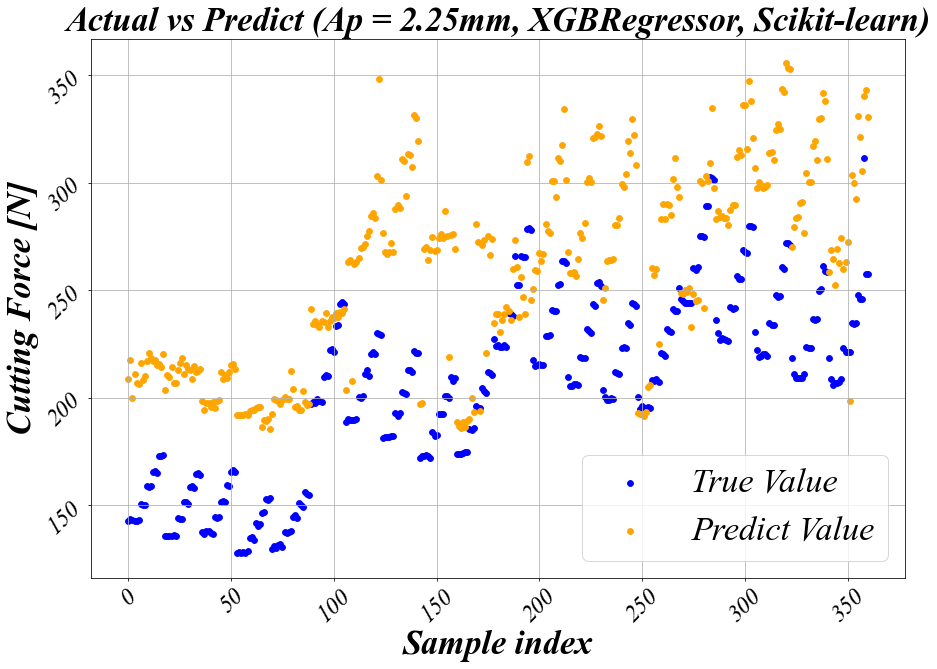

In [27]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 2.25mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

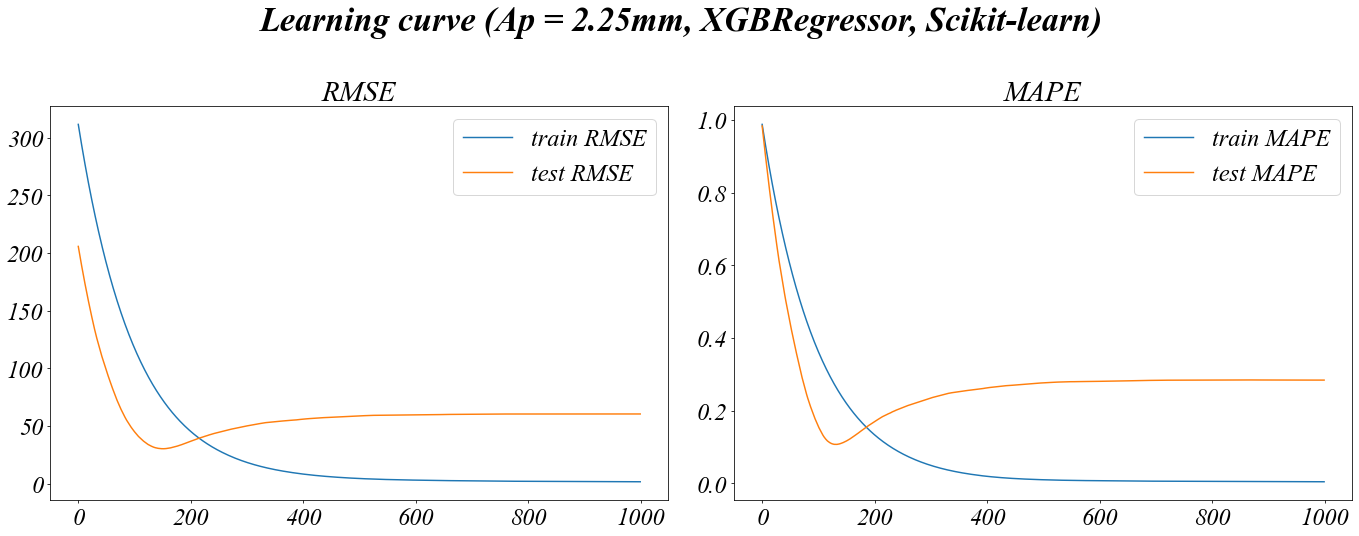

In [28]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 2.25mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 2.25mm_12800.png")

# ***Ap 3.5 test***

In [29]:
train = pd.concat([ap_100, ap_225, ap_475, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [30]:
X_test = ap_350.iloc[: , 1:]
y_test = ap_350['RMS_CF_max']

In [31]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [32]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:293.48418	validation_0-mape:0.98738	validation_1-rmse:292.94630	validation_1-mape:0.98732
[1]	validation_0-rmse:290.61009	validation_0-mape:0.97751	validation_1-rmse:289.85185	validation_1-mape:0.97656
[2]	validation_0-rmse:287.76478	validation_0-mape:0.96773	validation_1-rmse:286.78863	validation_1-mape:0.96590
[3]	validation_0-rmse:284.94796	validation_0-mape:0.95806	validation_1-rmse:283.75629	validation_1-mape:0.95535
[4]	validation_0-rmse:282.15931	validation_0-mape:0.94849	validation_1-rmse:280.75550	validation_1-mape:0.94490
[5]	validation_0-rmse:279.39857	validation_0-mape:0.93903	validation_1-rmse:277.66603	validation_1-mape:0.93425
[6]	validation_0-rmse:276.66519	validation_0-mape:0.92965	validation_1-rmse:274.72881	validation_1-mape:0.92404
[7]	validation_0-rmse:273.95924	validation_0-mape:0.92035	validation_1-rmse:271.69963	validation_1-mape:0.91358
[8]	validation_0-rmse:271.28012	validation_0-mape:0.91118	validation_1-rmse:268.82033	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[16]	validation_0-rmse:250.78613	validation_0-mape:0.84084	validation_1-rmse:246.53839	validation_1-mape:0.82622
[17]	validation_0-rmse:248.33766	validation_0-mape:0.83245	validation_1-rmse:243.99585	validation_1-mape:0.81732
[18]	validation_0-rmse:245.91281	validation_0-mape:0.82414	validation_1-rmse:241.25314	validation_1-mape:0.80793
[19]	validation_0-rmse:243.51241	validation_0-mape:0.81593	validation_1-rmse:238.75726	validation_1-mape:0.79919
[20]	validation_0-rmse:241.13653	validation_0-mape:0.80775	validation_1-rmse:236.20419	validation_1-mape:0.79027
[21]	validation_0-rmse:238.78398	validation_0-mape:0.79970	validation_1-rmse:233.55458	validation_1-mape:0.78117
[22]	validation_0-rmse:236.45392	validation_0-mape:0.79174	validation_1-rmse:230.93861	validation_1-mape:0.77217
[23]	validation_0-rmse:234.14799	validation_0-mape:0.78383	validation_1-rmse:228.63405	validation_1-mape:0.76410
[24]	validation_0-rmse:231.86462	validation_0-mape:0.77602	validation_1-rmse:226.26507	validatio

[89]	validation_0-rmse:122.96332	validation_0-mape:0.40479	validation_1-rmse:109.86803	validation_1-mape:0.35740
[90]	validation_0-rmse:121.77609	validation_0-mape:0.40076	validation_1-rmse:108.59101	validation_1-mape:0.35298
[91]	validation_0-rmse:120.60131	validation_0-mape:0.39677	validation_1-rmse:107.38611	validation_1-mape:0.34882
[92]	validation_0-rmse:119.43771	validation_0-mape:0.39282	validation_1-rmse:106.19554	validation_1-mape:0.34472
[93]	validation_0-rmse:118.28623	validation_0-mape:0.38892	validation_1-rmse:104.93305	validation_1-mape:0.34034
[94]	validation_0-rmse:117.14597	validation_0-mape:0.38505	validation_1-rmse:103.76673	validation_1-mape:0.33627
[95]	validation_0-rmse:116.01630	validation_0-mape:0.38122	validation_1-rmse:102.55992	validation_1-mape:0.33214
[96]	validation_0-rmse:114.89812	validation_0-mape:0.37743	validation_1-rmse:101.40968	validation_1-mape:0.32818
[97]	validation_0-rmse:113.79092	validation_0-mape:0.37368	validation_1-rmse:100.28525	validatio

[162]	validation_0-rmse:60.93020	validation_0-mape:0.19535	validation_1-rmse:49.74580	validation_1-mape:0.14665
[163]	validation_0-rmse:60.35151	validation_0-mape:0.19342	validation_1-rmse:49.14566	validation_1-mape:0.14456
[164]	validation_0-rmse:59.77859	validation_0-mape:0.19150	validation_1-rmse:48.55241	validation_1-mape:0.14248
[165]	validation_0-rmse:59.21270	validation_0-mape:0.18960	validation_1-rmse:47.95707	validation_1-mape:0.14042
[166]	validation_0-rmse:58.65107	validation_0-mape:0.18773	validation_1-rmse:47.37521	validation_1-mape:0.13841
[167]	validation_0-rmse:58.09767	validation_0-mape:0.18587	validation_1-rmse:46.91590	validation_1-mape:0.13670
[168]	validation_0-rmse:57.54803	validation_0-mape:0.18403	validation_1-rmse:46.35147	validation_1-mape:0.13469
[169]	validation_0-rmse:57.00555	validation_0-mape:0.18220	validation_1-rmse:45.85345	validation_1-mape:0.13289
[170]	validation_0-rmse:56.46571	validation_0-mape:0.18039	validation_1-rmse:45.29998	validation_1-mape:

[236]	validation_0-rmse:30.44085	validation_0-mape:0.09352	validation_1-rmse:24.70924	validation_1-mape:0.05804
[237]	validation_0-rmse:30.16120	validation_0-mape:0.09259	validation_1-rmse:24.54384	validation_1-mape:0.05752
[238]	validation_0-rmse:29.88487	validation_0-mape:0.09168	validation_1-rmse:24.37423	validation_1-mape:0.05696
[239]	validation_0-rmse:29.61082	validation_0-mape:0.09077	validation_1-rmse:24.21271	validation_1-mape:0.05645
[240]	validation_0-rmse:29.34081	validation_0-mape:0.08987	validation_1-rmse:24.04653	validation_1-mape:0.05594
[241]	validation_0-rmse:29.07299	validation_0-mape:0.08898	validation_1-rmse:23.89130	validation_1-mape:0.05545
[242]	validation_0-rmse:28.80744	validation_0-mape:0.08810	validation_1-rmse:23.72230	validation_1-mape:0.05494
[243]	validation_0-rmse:28.54546	validation_0-mape:0.08723	validation_1-rmse:23.56302	validation_1-mape:0.05446
[244]	validation_0-rmse:28.28429	validation_0-mape:0.08637	validation_1-rmse:23.39970	validation_1-mape:

[310]	validation_0-rmse:15.68805	validation_0-mape:0.04494	validation_1-rmse:17.88565	validation_1-mape:0.04151
[311]	validation_0-rmse:15.55328	validation_0-mape:0.04450	validation_1-rmse:17.85455	validation_1-mape:0.04150
[312]	validation_0-rmse:15.41979	validation_0-mape:0.04406	validation_1-rmse:17.82964	validation_1-mape:0.04150
[313]	validation_0-rmse:15.28787	validation_0-mape:0.04363	validation_1-rmse:17.80261	validation_1-mape:0.04150
[314]	validation_0-rmse:15.15633	validation_0-mape:0.04321	validation_1-rmse:17.77839	validation_1-mape:0.04151
[315]	validation_0-rmse:15.02563	validation_0-mape:0.04279	validation_1-rmse:17.73883	validation_1-mape:0.04149
[316]	validation_0-rmse:14.89667	validation_0-mape:0.04237	validation_1-rmse:17.71529	validation_1-mape:0.04149
[317]	validation_0-rmse:14.76971	validation_0-mape:0.04196	validation_1-rmse:17.69572	validation_1-mape:0.04151
[318]	validation_0-rmse:14.64401	validation_0-mape:0.04155	validation_1-rmse:17.67415	validation_1-mape:

[384]	validation_0-rmse:8.56609	validation_0-mape:0.02234	validation_1-rmse:17.42998	validation_1-mape:0.04422
[385]	validation_0-rmse:8.50024	validation_0-mape:0.02214	validation_1-rmse:17.43432	validation_1-mape:0.04427
[386]	validation_0-rmse:8.43618	validation_0-mape:0.02194	validation_1-rmse:17.44401	validation_1-mape:0.04435
[387]	validation_0-rmse:8.37208	validation_0-mape:0.02175	validation_1-rmse:17.44994	validation_1-mape:0.04440
[388]	validation_0-rmse:8.30896	validation_0-mape:0.02156	validation_1-rmse:17.45557	validation_1-mape:0.04446
[389]	validation_0-rmse:8.24681	validation_0-mape:0.02137	validation_1-rmse:17.46418	validation_1-mape:0.04451
[390]	validation_0-rmse:8.18537	validation_0-mape:0.02119	validation_1-rmse:17.47246	validation_1-mape:0.04456
[391]	validation_0-rmse:8.12420	validation_0-mape:0.02101	validation_1-rmse:17.47809	validation_1-mape:0.04461
[392]	validation_0-rmse:8.06399	validation_0-mape:0.02083	validation_1-rmse:17.48380	validation_1-mape:0.04466
[

[458]	validation_0-rmse:5.11848	validation_0-mape:0.01253	validation_1-rmse:17.89592	validation_1-mape:0.04775
[459]	validation_0-rmse:5.08744	validation_0-mape:0.01245	validation_1-rmse:17.90213	validation_1-mape:0.04779
[460]	validation_0-rmse:5.05730	validation_0-mape:0.01237	validation_1-rmse:17.90793	validation_1-mape:0.04783
[461]	validation_0-rmse:5.02707	validation_0-mape:0.01229	validation_1-rmse:17.91486	validation_1-mape:0.04788
[462]	validation_0-rmse:4.99733	validation_0-mape:0.01222	validation_1-rmse:17.92910	validation_1-mape:0.04795
[463]	validation_0-rmse:4.96610	validation_0-mape:0.01214	validation_1-rmse:17.93644	validation_1-mape:0.04800
[464]	validation_0-rmse:4.93531	validation_0-mape:0.01206	validation_1-rmse:17.94299	validation_1-mape:0.04804
[465]	validation_0-rmse:4.90492	validation_0-mape:0.01199	validation_1-rmse:17.95143	validation_1-mape:0.04809
[466]	validation_0-rmse:4.87485	validation_0-mape:0.01191	validation_1-rmse:17.95731	validation_1-mape:0.04814
[

[532]	validation_0-rmse:3.45911	validation_0-mape:0.00867	validation_1-rmse:18.36544	validation_1-mape:0.05032
[533]	validation_0-rmse:3.44270	validation_0-mape:0.00864	validation_1-rmse:18.37126	validation_1-mape:0.05035
[534]	validation_0-rmse:3.42864	validation_0-mape:0.00861	validation_1-rmse:18.37447	validation_1-mape:0.05037
[535]	validation_0-rmse:3.41346	validation_0-mape:0.00859	validation_1-rmse:18.38007	validation_1-mape:0.05040
[536]	validation_0-rmse:3.39868	validation_0-mape:0.00856	validation_1-rmse:18.38116	validation_1-mape:0.05041
[537]	validation_0-rmse:3.38383	validation_0-mape:0.00853	validation_1-rmse:18.38668	validation_1-mape:0.05044
[538]	validation_0-rmse:3.37050	validation_0-mape:0.00850	validation_1-rmse:18.38869	validation_1-mape:0.05046
[539]	validation_0-rmse:3.35591	validation_0-mape:0.00847	validation_1-rmse:18.39522	validation_1-mape:0.05049
[540]	validation_0-rmse:3.34274	validation_0-mape:0.00845	validation_1-rmse:18.39858	validation_1-mape:0.05052
[

[606]	validation_0-rmse:2.63694	validation_0-mape:0.00716	validation_1-rmse:18.63359	validation_1-mape:0.05167
[607]	validation_0-rmse:2.62933	validation_0-mape:0.00715	validation_1-rmse:18.63683	validation_1-mape:0.05168
[608]	validation_0-rmse:2.62194	validation_0-mape:0.00714	validation_1-rmse:18.63963	validation_1-mape:0.05169
[609]	validation_0-rmse:2.61360	validation_0-mape:0.00712	validation_1-rmse:18.64293	validation_1-mape:0.05171
[610]	validation_0-rmse:2.60638	validation_0-mape:0.00711	validation_1-rmse:18.64595	validation_1-mape:0.05172
[611]	validation_0-rmse:2.59818	validation_0-mape:0.00709	validation_1-rmse:18.64769	validation_1-mape:0.05172
[612]	validation_0-rmse:2.59052	validation_0-mape:0.00708	validation_1-rmse:18.65121	validation_1-mape:0.05173
[613]	validation_0-rmse:2.58282	validation_0-mape:0.00707	validation_1-rmse:18.65234	validation_1-mape:0.05174
[614]	validation_0-rmse:2.57555	validation_0-mape:0.00706	validation_1-rmse:18.65424	validation_1-mape:0.05175
[

[680]	validation_0-rmse:2.19455	validation_0-mape:0.00632	validation_1-rmse:18.77779	validation_1-mape:0.05227
[681]	validation_0-rmse:2.19065	validation_0-mape:0.00631	validation_1-rmse:18.78033	validation_1-mape:0.05228
[682]	validation_0-rmse:2.18589	validation_0-mape:0.00630	validation_1-rmse:18.78126	validation_1-mape:0.05229
[683]	validation_0-rmse:2.18210	validation_0-mape:0.00630	validation_1-rmse:18.78369	validation_1-mape:0.05230
[684]	validation_0-rmse:2.17697	validation_0-mape:0.00629	validation_1-rmse:18.78564	validation_1-mape:0.05231
[685]	validation_0-rmse:2.17209	validation_0-mape:0.00627	validation_1-rmse:18.78759	validation_1-mape:0.05232
[686]	validation_0-rmse:2.16836	validation_0-mape:0.00626	validation_1-rmse:18.78978	validation_1-mape:0.05233
[687]	validation_0-rmse:2.16386	validation_0-mape:0.00626	validation_1-rmse:18.79128	validation_1-mape:0.05233
[688]	validation_0-rmse:2.16038	validation_0-mape:0.00625	validation_1-rmse:18.79283	validation_1-mape:0.05234
[

[754]	validation_0-rmse:1.93842	validation_0-mape:0.00578	validation_1-rmse:18.80246	validation_1-mape:0.05251
[755]	validation_0-rmse:1.93670	validation_0-mape:0.00578	validation_1-rmse:18.80411	validation_1-mape:0.05252
[756]	validation_0-rmse:1.93331	validation_0-mape:0.00577	validation_1-rmse:18.80558	validation_1-mape:0.05253
[757]	validation_0-rmse:1.92877	validation_0-mape:0.00576	validation_1-rmse:18.80695	validation_1-mape:0.05253
[758]	validation_0-rmse:1.92663	validation_0-mape:0.00576	validation_1-rmse:18.80764	validation_1-mape:0.05254
[759]	validation_0-rmse:1.92212	validation_0-mape:0.00575	validation_1-rmse:18.80839	validation_1-mape:0.05254
[760]	validation_0-rmse:1.92002	validation_0-mape:0.00575	validation_1-rmse:18.80906	validation_1-mape:0.05255
[761]	validation_0-rmse:1.91558	validation_0-mape:0.00574	validation_1-rmse:18.80994	validation_1-mape:0.05255
[762]	validation_0-rmse:1.91352	validation_0-mape:0.00573	validation_1-rmse:18.81061	validation_1-mape:0.05256
[

[828]	validation_0-rmse:1.74343	validation_0-mape:0.00536	validation_1-rmse:18.81657	validation_1-mape:0.05268
[829]	validation_0-rmse:1.74229	validation_0-mape:0.00535	validation_1-rmse:18.81701	validation_1-mape:0.05268
[830]	validation_0-rmse:1.73986	validation_0-mape:0.00535	validation_1-rmse:18.81685	validation_1-mape:0.05268
[831]	validation_0-rmse:1.73888	validation_0-mape:0.00535	validation_1-rmse:18.81758	validation_1-mape:0.05269
[832]	validation_0-rmse:1.73447	validation_0-mape:0.00534	validation_1-rmse:18.81792	validation_1-mape:0.05269
[833]	validation_0-rmse:1.73146	validation_0-mape:0.00533	validation_1-rmse:18.81721	validation_1-mape:0.05269
[834]	validation_0-rmse:1.72908	validation_0-mape:0.00532	validation_1-rmse:18.81703	validation_1-mape:0.05269
[835]	validation_0-rmse:1.72683	validation_0-mape:0.00532	validation_1-rmse:18.81685	validation_1-mape:0.05269
[836]	validation_0-rmse:1.72509	validation_0-mape:0.00531	validation_1-rmse:18.81773	validation_1-mape:0.05269
[

[902]	validation_0-rmse:1.59577	validation_0-mape:0.00502	validation_1-rmse:18.82352	validation_1-mape:0.05276
[903]	validation_0-rmse:1.59467	validation_0-mape:0.00502	validation_1-rmse:18.82291	validation_1-mape:0.05276
[904]	validation_0-rmse:1.59331	validation_0-mape:0.00502	validation_1-rmse:18.82357	validation_1-mape:0.05276
[905]	validation_0-rmse:1.59107	validation_0-mape:0.00501	validation_1-rmse:18.82333	validation_1-mape:0.05276
[906]	validation_0-rmse:1.58988	validation_0-mape:0.00501	validation_1-rmse:18.82311	validation_1-mape:0.05276
[907]	validation_0-rmse:1.58806	validation_0-mape:0.00501	validation_1-rmse:18.82384	validation_1-mape:0.05276
[908]	validation_0-rmse:1.58644	validation_0-mape:0.00500	validation_1-rmse:18.82439	validation_1-mape:0.05276
[909]	validation_0-rmse:1.58495	validation_0-mape:0.00500	validation_1-rmse:18.82367	validation_1-mape:0.05276
[910]	validation_0-rmse:1.58384	validation_0-mape:0.00500	validation_1-rmse:18.82418	validation_1-mape:0.05276
[

[976]	validation_0-rmse:1.50345	validation_0-mape:0.00480	validation_1-rmse:18.83215	validation_1-mape:0.05280
[977]	validation_0-rmse:1.50202	validation_0-mape:0.00480	validation_1-rmse:18.83173	validation_1-mape:0.05280
[978]	validation_0-rmse:1.50087	validation_0-mape:0.00480	validation_1-rmse:18.83231	validation_1-mape:0.05280
[979]	validation_0-rmse:1.49895	validation_0-mape:0.00479	validation_1-rmse:18.83342	validation_1-mape:0.05280
[980]	validation_0-rmse:1.49776	validation_0-mape:0.00479	validation_1-rmse:18.83375	validation_1-mape:0.05280
[981]	validation_0-rmse:1.49599	validation_0-mape:0.00479	validation_1-rmse:18.83394	validation_1-mape:0.05281
[982]	validation_0-rmse:1.49487	validation_0-mape:0.00478	validation_1-rmse:18.83398	validation_1-mape:0.05281
[983]	validation_0-rmse:1.49297	validation_0-mape:0.00478	validation_1-rmse:18.83474	validation_1-mape:0.05281
[984]	validation_0-rmse:1.49200	validation_0-mape:0.00477	validation_1-rmse:18.83540	validation_1-mape:0.05281
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [33]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.4723
Train MAPE: 0.4722
Test RMSE: 18.8378
Test MAPE: 5.2822


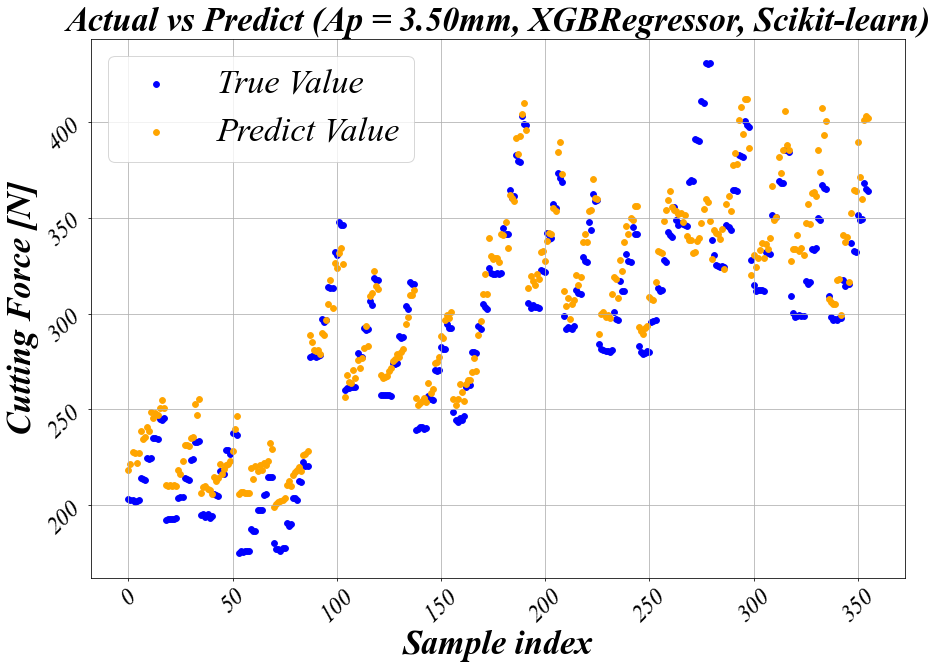

In [34]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 3.50mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

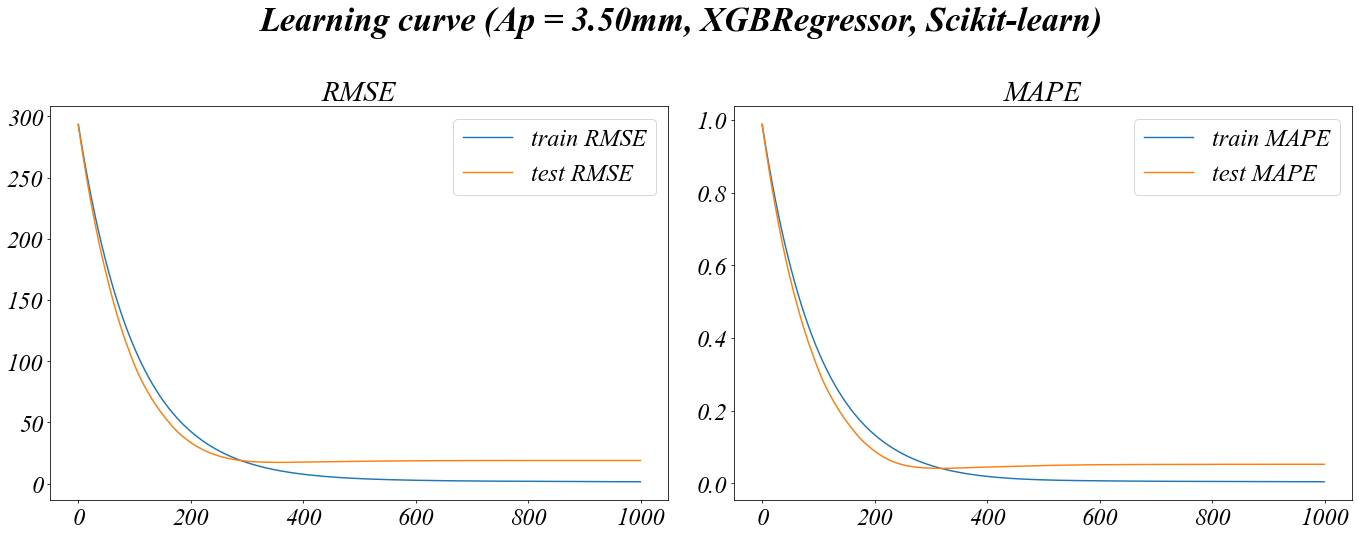

In [35]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 3.50mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 3.50mm_12800.png")

# ***Ap 4.75 test***

In [36]:
train = pd.concat([ap_100, ap_225, ap_350, ap_600], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [37]:
X_test = ap_475.iloc[: , 1:]
y_test = ap_475['RMS_CF_max']

In [38]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [39]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:283.75059	validation_0-mape:0.98733	validation_1-rmse:329.41024	validation_1-mape:0.98809
[1]	validation_0-rmse:280.97317	validation_0-mape:0.97745	validation_1-rmse:326.15900	validation_1-mape:0.97788
[2]	validation_0-rmse:278.22354	validation_0-mape:0.96767	validation_1-rmse:322.93769	validation_1-mape:0.96776
[3]	validation_0-rmse:275.49849	validation_0-mape:0.95797	validation_1-rmse:319.76910	validation_1-mape:0.95775
[4]	validation_0-rmse:272.80117	validation_0-mape:0.94837	validation_1-rmse:316.67268	validation_1-mape:0.94796
[5]	validation_0-rmse:270.13094	validation_0-mape:0.93886	validation_1-rmse:313.59631	validation_1-mape:0.93823
[6]	validation_0-rmse:267.48746	validation_0-mape:0.92945	validation_1-rmse:310.50850	validation_1-mape:0.92850
[7]	validation_0-rmse:264.86979	validation_0-mape:0.92014	validation_1-rmse:307.46739	validation_1-mape:0.91887
[8]	validation_0-rmse:262.27867	validation_0-mape:0.91091	validation_1-rmse:304.43018	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[18]	validation_0-rmse:237.75380	validation_0-mape:0.82365	validation_1-rmse:275.99818	validation_1-mape:0.81981
[19]	validation_0-rmse:235.43481	validation_0-mape:0.81543	validation_1-rmse:273.31340	validation_1-mape:0.81131
[20]	validation_0-rmse:233.13709	validation_0-mape:0.80726	validation_1-rmse:270.63484	validation_1-mape:0.80289
[21]	validation_0-rmse:230.86065	validation_0-mape:0.79921	validation_1-rmse:267.89066	validation_1-mape:0.79426
[22]	validation_0-rmse:228.60944	validation_0-mape:0.79121	validation_1-rmse:265.34430	validation_1-mape:0.78625
[23]	validation_0-rmse:226.37818	validation_0-mape:0.78332	validation_1-rmse:262.69526	validation_1-mape:0.77789
[24]	validation_0-rmse:224.16986	validation_0-mape:0.77550	validation_1-rmse:260.19537	validation_1-mape:0.77005
[25]	validation_0-rmse:221.98354	validation_0-mape:0.76775	validation_1-rmse:257.76409	validation_1-mape:0.76235
[26]	validation_0-rmse:219.81888	validation_0-mape:0.76008	validation_1-rmse:255.31745	validatio

[91]	validation_0-rmse:116.66280	validation_0-mape:0.39657	validation_1-rmse:137.25050	validation_1-mape:0.37973
[92]	validation_0-rmse:115.53667	validation_0-mape:0.39262	validation_1-rmse:135.99944	validation_1-mape:0.37571
[93]	validation_0-rmse:114.42458	validation_0-mape:0.38872	validation_1-rmse:134.74100	validation_1-mape:0.37165
[94]	validation_0-rmse:113.32116	validation_0-mape:0.38485	validation_1-rmse:133.50318	validation_1-mape:0.36759
[95]	validation_0-rmse:112.23102	validation_0-mape:0.38102	validation_1-rmse:132.27316	validation_1-mape:0.36362
[96]	validation_0-rmse:111.15089	validation_0-mape:0.37723	validation_1-rmse:131.10743	validation_1-mape:0.35974
[97]	validation_0-rmse:110.07944	validation_0-mape:0.37348	validation_1-rmse:129.92044	validation_1-mape:0.35590
[98]	validation_0-rmse:109.01941	validation_0-mape:0.36976	validation_1-rmse:128.74276	validation_1-mape:0.35214
[99]	validation_0-rmse:107.97013	validation_0-mape:0.36606	validation_1-rmse:127.53070	validatio

[164]	validation_0-rmse:57.85999	validation_0-mape:0.19153	validation_1-rmse:75.18260	validation_1-mape:0.17951
[165]	validation_0-rmse:57.31146	validation_0-mape:0.18964	validation_1-rmse:74.67186	validation_1-mape:0.17810
[166]	validation_0-rmse:56.76665	validation_0-mape:0.18777	validation_1-rmse:74.15928	validation_1-mape:0.17668
[167]	validation_0-rmse:56.22907	validation_0-mape:0.18591	validation_1-rmse:73.65716	validation_1-mape:0.17528
[168]	validation_0-rmse:55.69626	validation_0-mape:0.18407	validation_1-rmse:73.17183	validation_1-mape:0.17391
[169]	validation_0-rmse:55.16948	validation_0-mape:0.18225	validation_1-rmse:72.68267	validation_1-mape:0.17256
[170]	validation_0-rmse:54.64828	validation_0-mape:0.18045	validation_1-rmse:72.20903	validation_1-mape:0.17124
[171]	validation_0-rmse:54.13149	validation_0-mape:0.17867	validation_1-rmse:71.72368	validation_1-mape:0.16988
[172]	validation_0-rmse:53.61860	validation_0-mape:0.17690	validation_1-rmse:71.25468	validation_1-mape:

[238]	validation_0-rmse:28.93492	validation_0-mape:0.09195	validation_1-rmse:50.83335	validation_1-mape:0.11807
[239]	validation_0-rmse:28.67079	validation_0-mape:0.09105	validation_1-rmse:50.62998	validation_1-mape:0.11761
[240]	validation_0-rmse:28.40943	validation_0-mape:0.09014	validation_1-rmse:50.44754	validation_1-mape:0.11726
[241]	validation_0-rmse:28.15056	validation_0-mape:0.08926	validation_1-rmse:50.25094	validation_1-mape:0.11683
[242]	validation_0-rmse:27.89441	validation_0-mape:0.08838	validation_1-rmse:50.07760	validation_1-mape:0.11650
[243]	validation_0-rmse:27.64068	validation_0-mape:0.08751	validation_1-rmse:49.89522	validation_1-mape:0.11609
[244]	validation_0-rmse:27.38981	validation_0-mape:0.08665	validation_1-rmse:49.71690	validation_1-mape:0.11568
[245]	validation_0-rmse:27.14201	validation_0-mape:0.08580	validation_1-rmse:49.55601	validation_1-mape:0.11535
[246]	validation_0-rmse:26.89562	validation_0-mape:0.08495	validation_1-rmse:49.38870	validation_1-mape:

[312]	validation_0-rmse:14.98137	validation_0-mape:0.04422	validation_1-rmse:42.79831	validation_1-mape:0.10183
[313]	validation_0-rmse:14.85358	validation_0-mape:0.04378	validation_1-rmse:42.75923	validation_1-mape:0.10175
[314]	validation_0-rmse:14.72731	validation_0-mape:0.04335	validation_1-rmse:42.71751	validation_1-mape:0.10166
[315]	validation_0-rmse:14.60217	validation_0-mape:0.04293	validation_1-rmse:42.67051	validation_1-mape:0.10158
[316]	validation_0-rmse:14.47837	validation_0-mape:0.04251	validation_1-rmse:42.63603	validation_1-mape:0.10151
[317]	validation_0-rmse:14.35601	validation_0-mape:0.04209	validation_1-rmse:42.59907	validation_1-mape:0.10142
[318]	validation_0-rmse:14.23502	validation_0-mape:0.04168	validation_1-rmse:42.52427	validation_1-mape:0.10126
[319]	validation_0-rmse:14.11491	validation_0-mape:0.04127	validation_1-rmse:42.48384	validation_1-mape:0.10117
[320]	validation_0-rmse:13.99635	validation_0-mape:0.04087	validation_1-rmse:42.44962	validation_1-mape:

[386]	validation_0-rmse:8.23540	validation_0-mape:0.02194	validation_1-rmse:40.56029	validation_1-mape:0.09703
[387]	validation_0-rmse:8.17565	validation_0-mape:0.02175	validation_1-rmse:40.55828	validation_1-mape:0.09703
[388]	validation_0-rmse:8.11616	validation_0-mape:0.02156	validation_1-rmse:40.55098	validation_1-mape:0.09702
[389]	validation_0-rmse:8.05614	validation_0-mape:0.02137	validation_1-rmse:40.53191	validation_1-mape:0.09698
[390]	validation_0-rmse:7.99674	validation_0-mape:0.02119	validation_1-rmse:40.51214	validation_1-mape:0.09695
[391]	validation_0-rmse:7.93780	validation_0-mape:0.02101	validation_1-rmse:40.48681	validation_1-mape:0.09690
[392]	validation_0-rmse:7.88141	validation_0-mape:0.02083	validation_1-rmse:40.47956	validation_1-mape:0.09689
[393]	validation_0-rmse:7.82397	validation_0-mape:0.02064	validation_1-rmse:40.46364	validation_1-mape:0.09687
[394]	validation_0-rmse:7.76650	validation_0-mape:0.02047	validation_1-rmse:40.44301	validation_1-mape:0.09683
[

[460]	validation_0-rmse:5.06016	validation_0-mape:0.01255	validation_1-rmse:39.93124	validation_1-mape:0.09634
[461]	validation_0-rmse:5.03003	validation_0-mape:0.01248	validation_1-rmse:39.92213	validation_1-mape:0.09634
[462]	validation_0-rmse:5.00045	validation_0-mape:0.01240	validation_1-rmse:39.91327	validation_1-mape:0.09632
[463]	validation_0-rmse:4.97161	validation_0-mape:0.01233	validation_1-rmse:39.90396	validation_1-mape:0.09631
[464]	validation_0-rmse:4.94243	validation_0-mape:0.01226	validation_1-rmse:39.89548	validation_1-mape:0.09630
[465]	validation_0-rmse:4.91441	validation_0-mape:0.01219	validation_1-rmse:39.88801	validation_1-mape:0.09630
[466]	validation_0-rmse:4.88768	validation_0-mape:0.01212	validation_1-rmse:39.88702	validation_1-mape:0.09630
[467]	validation_0-rmse:4.85980	validation_0-mape:0.01205	validation_1-rmse:39.87110	validation_1-mape:0.09626
[468]	validation_0-rmse:4.83229	validation_0-mape:0.01198	validation_1-rmse:39.85513	validation_1-mape:0.09623
[

[534]	validation_0-rmse:3.52482	validation_0-mape:0.00916	validation_1-rmse:39.44808	validation_1-mape:0.09553
[535]	validation_0-rmse:3.51159	validation_0-mape:0.00914	validation_1-rmse:39.44569	validation_1-mape:0.09553
[536]	validation_0-rmse:3.49884	validation_0-mape:0.00912	validation_1-rmse:39.43933	validation_1-mape:0.09551
[537]	validation_0-rmse:3.48473	validation_0-mape:0.00909	validation_1-rmse:39.43667	validation_1-mape:0.09551
[538]	validation_0-rmse:3.47060	validation_0-mape:0.00906	validation_1-rmse:39.43481	validation_1-mape:0.09551
[539]	validation_0-rmse:3.45734	validation_0-mape:0.00904	validation_1-rmse:39.43009	validation_1-mape:0.09549
[540]	validation_0-rmse:3.44223	validation_0-mape:0.00901	validation_1-rmse:39.42873	validation_1-mape:0.09549
[541]	validation_0-rmse:3.42990	validation_0-mape:0.00899	validation_1-rmse:39.42185	validation_1-mape:0.09547
[542]	validation_0-rmse:3.41514	validation_0-mape:0.00896	validation_1-rmse:39.42104	validation_1-mape:0.09547
[

[608]	validation_0-rmse:2.71649	validation_0-mape:0.00765	validation_1-rmse:39.28672	validation_1-mape:0.09532
[609]	validation_0-rmse:2.70996	validation_0-mape:0.00764	validation_1-rmse:39.28711	validation_1-mape:0.09532
[610]	validation_0-rmse:2.70296	validation_0-mape:0.00763	validation_1-rmse:39.28672	validation_1-mape:0.09532
[611]	validation_0-rmse:2.69511	validation_0-mape:0.00761	validation_1-rmse:39.28662	validation_1-mape:0.09533
[612]	validation_0-rmse:2.68618	validation_0-mape:0.00759	validation_1-rmse:39.28860	validation_1-mape:0.09533
[613]	validation_0-rmse:2.67740	validation_0-mape:0.00758	validation_1-rmse:39.28783	validation_1-mape:0.09533
[614]	validation_0-rmse:2.67077	validation_0-mape:0.00756	validation_1-rmse:39.28606	validation_1-mape:0.09533
[615]	validation_0-rmse:2.66317	validation_0-mape:0.00755	validation_1-rmse:39.28614	validation_1-mape:0.09533
[616]	validation_0-rmse:2.65461	validation_0-mape:0.00754	validation_1-rmse:39.28544	validation_1-mape:0.09533
[

[682]	validation_0-rmse:2.26236	validation_0-mape:0.00674	validation_1-rmse:39.25552	validation_1-mape:0.09527
[683]	validation_0-rmse:2.25849	validation_0-mape:0.00673	validation_1-rmse:39.25442	validation_1-mape:0.09526
[684]	validation_0-rmse:2.25410	validation_0-mape:0.00673	validation_1-rmse:39.25387	validation_1-mape:0.09527
[685]	validation_0-rmse:2.25025	validation_0-mape:0.00671	validation_1-rmse:39.25378	validation_1-mape:0.09527
[686]	validation_0-rmse:2.24615	validation_0-mape:0.00671	validation_1-rmse:39.24972	validation_1-mape:0.09526
[687]	validation_0-rmse:2.24240	validation_0-mape:0.00670	validation_1-rmse:39.24866	validation_1-mape:0.09525
[688]	validation_0-rmse:2.23839	validation_0-mape:0.00669	validation_1-rmse:39.24472	validation_1-mape:0.09524
[689]	validation_0-rmse:2.23512	validation_0-mape:0.00668	validation_1-rmse:39.24459	validation_1-mape:0.09524
[690]	validation_0-rmse:2.23017	validation_0-mape:0.00667	validation_1-rmse:39.24336	validation_1-mape:0.09524
[

[756]	validation_0-rmse:2.00137	validation_0-mape:0.00618	validation_1-rmse:39.15979	validation_1-mape:0.09510
[757]	validation_0-rmse:1.99886	validation_0-mape:0.00617	validation_1-rmse:39.16001	validation_1-mape:0.09511
[758]	validation_0-rmse:1.99603	validation_0-mape:0.00617	validation_1-rmse:39.15872	validation_1-mape:0.09510
[759]	validation_0-rmse:1.99212	validation_0-mape:0.00616	validation_1-rmse:39.15792	validation_1-mape:0.09510
[760]	validation_0-rmse:1.98966	validation_0-mape:0.00616	validation_1-rmse:39.15810	validation_1-mape:0.09511
[761]	validation_0-rmse:1.98532	validation_0-mape:0.00615	validation_1-rmse:39.15911	validation_1-mape:0.09511
[762]	validation_0-rmse:1.98226	validation_0-mape:0.00614	validation_1-rmse:39.15716	validation_1-mape:0.09511
[763]	validation_0-rmse:1.97950	validation_0-mape:0.00614	validation_1-rmse:39.15590	validation_1-mape:0.09510
[764]	validation_0-rmse:1.97565	validation_0-mape:0.00613	validation_1-rmse:39.15401	validation_1-mape:0.09510
[

[830]	validation_0-rmse:1.79787	validation_0-mape:0.00570	validation_1-rmse:39.12318	validation_1-mape:0.09504
[831]	validation_0-rmse:1.79604	validation_0-mape:0.00570	validation_1-rmse:39.12214	validation_1-mape:0.09504
[832]	validation_0-rmse:1.79439	validation_0-mape:0.00569	validation_1-rmse:39.12164	validation_1-mape:0.09504
[833]	validation_0-rmse:1.79212	validation_0-mape:0.00568	validation_1-rmse:39.12161	validation_1-mape:0.09504
[834]	validation_0-rmse:1.78946	validation_0-mape:0.00568	validation_1-rmse:39.12281	validation_1-mape:0.09504
[835]	validation_0-rmse:1.78740	validation_0-mape:0.00567	validation_1-rmse:39.12126	validation_1-mape:0.09504
[836]	validation_0-rmse:1.78603	validation_0-mape:0.00567	validation_1-rmse:39.12151	validation_1-mape:0.09504
[837]	validation_0-rmse:1.78381	validation_0-mape:0.00566	validation_1-rmse:39.12148	validation_1-mape:0.09504
[838]	validation_0-rmse:1.78157	validation_0-mape:0.00566	validation_1-rmse:39.12068	validation_1-mape:0.09503
[

[904]	validation_0-rmse:1.65607	validation_0-mape:0.00533	validation_1-rmse:39.09862	validation_1-mape:0.09495
[905]	validation_0-rmse:1.65481	validation_0-mape:0.00533	validation_1-rmse:39.09851	validation_1-mape:0.09495
[906]	validation_0-rmse:1.65334	validation_0-mape:0.00532	validation_1-rmse:39.09757	validation_1-mape:0.09495
[907]	validation_0-rmse:1.65140	validation_0-mape:0.00532	validation_1-rmse:39.09772	validation_1-mape:0.09495
[908]	validation_0-rmse:1.64995	validation_0-mape:0.00532	validation_1-rmse:39.09672	validation_1-mape:0.09495
[909]	validation_0-rmse:1.64865	validation_0-mape:0.00531	validation_1-rmse:39.09708	validation_1-mape:0.09495
[910]	validation_0-rmse:1.64581	validation_0-mape:0.00531	validation_1-rmse:39.09648	validation_1-mape:0.09495
[911]	validation_0-rmse:1.64412	validation_0-mape:0.00530	validation_1-rmse:39.09595	validation_1-mape:0.09495
[912]	validation_0-rmse:1.64316	validation_0-mape:0.00530	validation_1-rmse:39.09629	validation_1-mape:0.09495
[

[978]	validation_0-rmse:1.55236	validation_0-mape:0.00505	validation_1-rmse:39.09017	validation_1-mape:0.09492
[979]	validation_0-rmse:1.54951	validation_0-mape:0.00505	validation_1-rmse:39.08949	validation_1-mape:0.09492
[980]	validation_0-rmse:1.54844	validation_0-mape:0.00505	validation_1-rmse:39.08885	validation_1-mape:0.09492
[981]	validation_0-rmse:1.54681	validation_0-mape:0.00504	validation_1-rmse:39.08787	validation_1-mape:0.09492
[982]	validation_0-rmse:1.54528	validation_0-mape:0.00503	validation_1-rmse:39.08764	validation_1-mape:0.09492
[983]	validation_0-rmse:1.54279	validation_0-mape:0.00503	validation_1-rmse:39.08800	validation_1-mape:0.09492
[984]	validation_0-rmse:1.54142	validation_0-mape:0.00502	validation_1-rmse:39.08576	validation_1-mape:0.09491
[985]	validation_0-rmse:1.54049	validation_0-mape:0.00502	validation_1-rmse:39.08579	validation_1-mape:0.09491
[986]	validation_0-rmse:1.53915	validation_0-mape:0.00502	validation_1-rmse:39.08430	validation_1-mape:0.09491
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [40]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.5222
Train MAPE: 0.4973
Test RMSE: 39.0834
Test MAPE: 9.4903


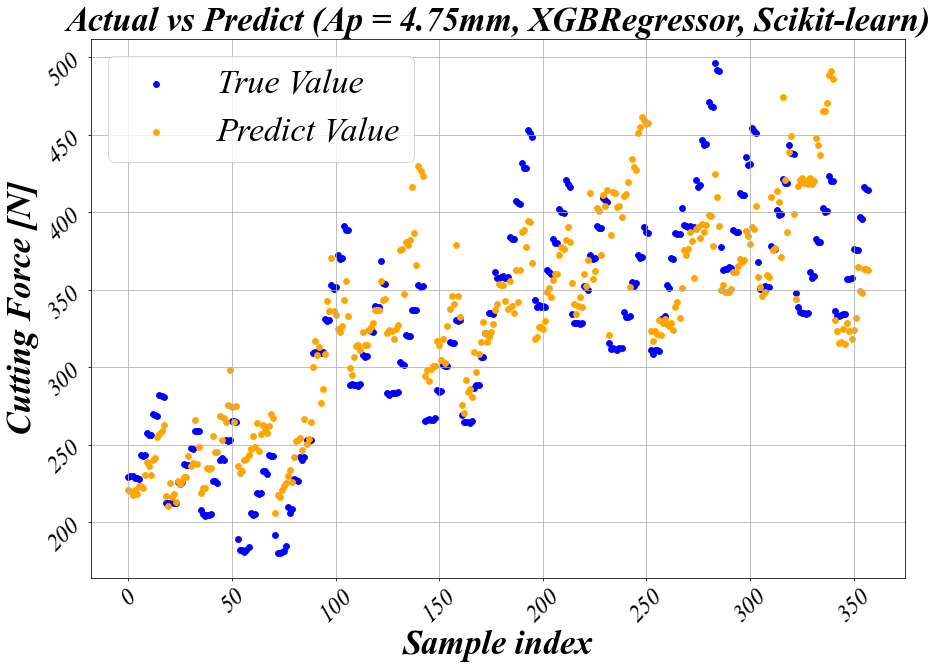

In [41]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 4.75mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

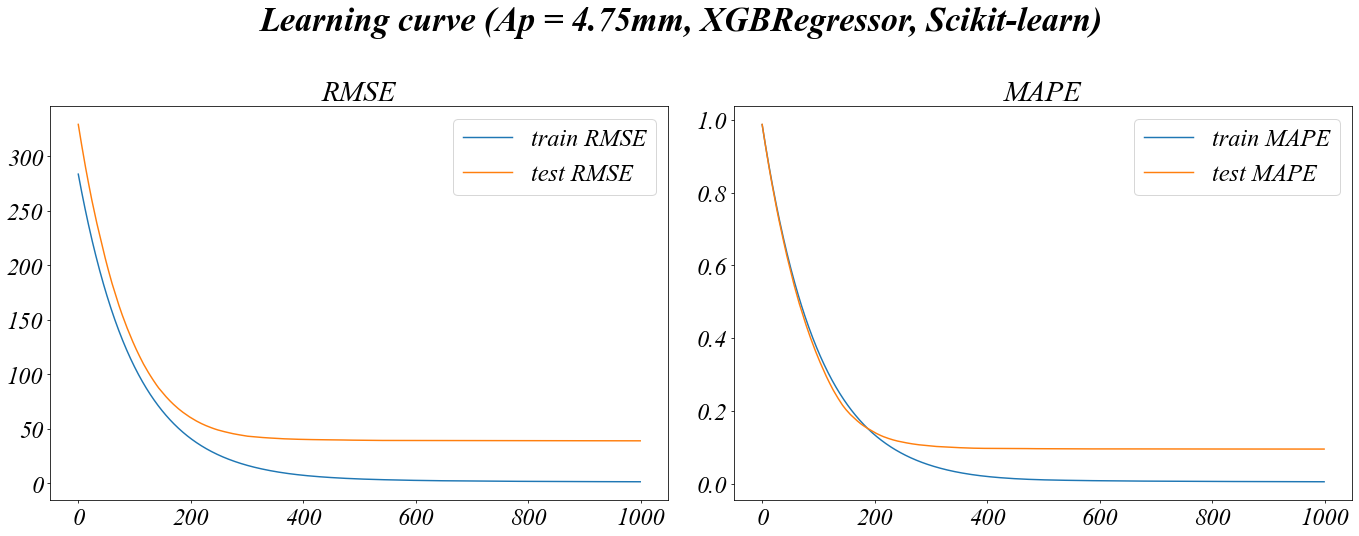

In [42]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 4.75mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 4.75mm_12800.png")

# ***Ap 6 test***

In [43]:
train = pd.concat([ap_100, ap_225, ap_350, ap_475], axis  = 0)
train = train.reset_index(drop=True)
X_train = train.iloc[: , 1:]
y_train = train['RMS_CF_max']

In [44]:
X_test = ap_600.iloc[: , 1:]
y_test = ap_600['RMS_CF_max']

In [45]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [46]:
xgb = XGBRegressor(learning_rate = 0.01,
                   n_estimators = 1000,
                   n_jobs  = -1,random_state=42)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)] # 학습에 사용한 데이터셋과 검증에 사용한 데이터셋

xgb.fit(X_train_scaled, y_train,eval_set=eval_set, eval_metric=['rmse', 'mape'])

[0]	validation_0-rmse:248.60954	validation_0-mape:0.98722	validation_1-rmse:427.49688	validation_1-mape:0.99084
[1]	validation_0-rmse:246.16891	validation_0-mape:0.97732	validation_1-rmse:424.22393	validation_1-mape:0.98301
[2]	validation_0-rmse:243.75279	validation_0-mape:0.96753	validation_1-rmse:420.98389	validation_1-mape:0.97526
[3]	validation_0-rmse:241.36093	validation_0-mape:0.95783	validation_1-rmse:417.77641	validation_1-mape:0.96759
[4]	validation_0-rmse:238.99311	validation_0-mape:0.94822	validation_1-rmse:414.60119	validation_1-mape:0.95999
[5]	validation_0-rmse:236.64906	validation_0-mape:0.93873	validation_1-rmse:411.45791	validation_1-mape:0.95247
[6]	validation_0-rmse:234.32856	validation_0-mape:0.92932	validation_1-rmse:408.34624	validation_1-mape:0.94502
[7]	validation_0-rmse:232.03121	validation_0-mape:0.92001	validation_1-rmse:405.26391	validation_1-mape:0.93765
[8]	validation_0-rmse:229.75694	validation_0-mape:0.91078	validation_1-rmse:402.21260	validation_1-mape:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


[13]	validation_0-rmse:218.72650	validation_0-mape:0.86608	validation_1-rmse:387.47291	validation_1-mape:0.89512
[14]	validation_0-rmse:216.58550	validation_0-mape:0.85740	validation_1-rmse:384.58128	validation_1-mape:0.88820
[15]	validation_0-rmse:214.46602	validation_0-mape:0.84881	validation_1-rmse:381.71874	validation_1-mape:0.88135
[16]	validation_0-rmse:212.37100	validation_0-mape:0.84032	validation_1-rmse:379.02898	validation_1-mape:0.87488
[17]	validation_0-rmse:210.29607	validation_0-mape:0.83194	validation_1-rmse:376.32194	validation_1-mape:0.86845
[18]	validation_0-rmse:208.24258	validation_0-mape:0.82363	validation_1-rmse:373.68609	validation_1-mape:0.86210
[19]	validation_0-rmse:206.20608	validation_0-mape:0.81538	validation_1-rmse:370.93451	validation_1-mape:0.85551
[20]	validation_0-rmse:204.19301	validation_0-mape:0.80724	validation_1-rmse:368.28133	validation_1-mape:0.84915
[21]	validation_0-rmse:202.20023	validation_0-mape:0.79917	validation_1-rmse:365.72391	validatio

[86]	validation_0-rmse:107.07064	validation_0-mape:0.41652	validation_1-rmse:237.00774	validation_1-mape:0.53433
[87]	validation_0-rmse:106.02903	validation_0-mape:0.41237	validation_1-rmse:235.65808	validation_1-mape:0.53121
[88]	validation_0-rmse:104.99801	validation_0-mape:0.40826	validation_1-rmse:234.33018	validation_1-mape:0.52813
[89]	validation_0-rmse:103.98273	validation_0-mape:0.40420	validation_1-rmse:232.88090	validation_1-mape:0.52456
[90]	validation_0-rmse:102.97216	validation_0-mape:0.40017	validation_1-rmse:231.58031	validation_1-mape:0.52155
[91]	validation_0-rmse:101.97121	validation_0-mape:0.39619	validation_1-rmse:230.26276	validation_1-mape:0.51852
[92]	validation_0-rmse:100.98500	validation_0-mape:0.39225	validation_1-rmse:228.92028	validation_1-mape:0.51524
[93]	validation_0-rmse:100.00421	validation_0-mape:0.38834	validation_1-rmse:227.62688	validation_1-mape:0.51227
[94]	validation_0-rmse:99.03276	validation_0-mape:0.38448	validation_1-rmse:226.34057	validation

[159]	validation_0-rmse:52.81277	validation_0-mape:0.20099	validation_1-rmse:162.88876	validation_1-mape:0.36134
[160]	validation_0-rmse:52.30876	validation_0-mape:0.19900	validation_1-rmse:162.18656	validation_1-mape:0.35973
[161]	validation_0-rmse:51.80977	validation_0-mape:0.19704	validation_1-rmse:161.50098	validation_1-mape:0.35812
[162]	validation_0-rmse:51.31689	validation_0-mape:0.19508	validation_1-rmse:160.75846	validation_1-mape:0.35636
[163]	validation_0-rmse:50.82783	validation_0-mape:0.19315	validation_1-rmse:160.08110	validation_1-mape:0.35482
[164]	validation_0-rmse:50.34338	validation_0-mape:0.19125	validation_1-rmse:159.40382	validation_1-mape:0.35326
[165]	validation_0-rmse:49.86360	validation_0-mape:0.18935	validation_1-rmse:158.74589	validation_1-mape:0.35173
[166]	validation_0-rmse:49.38893	validation_0-mape:0.18748	validation_1-rmse:158.08308	validation_1-mape:0.35021
[167]	validation_0-rmse:48.91835	validation_0-mape:0.18563	validation_1-rmse:157.42233	validatio

[232]	validation_0-rmse:26.50618	validation_0-mape:0.09745	validation_1-rmse:125.66582	validation_1-mape:0.27452
[233]	validation_0-rmse:26.26194	validation_0-mape:0.09649	validation_1-rmse:125.29594	validation_1-mape:0.27363
[234]	validation_0-rmse:26.02016	validation_0-mape:0.09554	validation_1-rmse:124.93579	validation_1-mape:0.27276
[235]	validation_0-rmse:25.77943	validation_0-mape:0.09460	validation_1-rmse:124.60619	validation_1-mape:0.27203
[236]	validation_0-rmse:25.54187	validation_0-mape:0.09367	validation_1-rmse:124.26221	validation_1-mape:0.27120
[237]	validation_0-rmse:25.30723	validation_0-mape:0.09274	validation_1-rmse:123.90923	validation_1-mape:0.27035
[238]	validation_0-rmse:25.07499	validation_0-mape:0.09183	validation_1-rmse:123.57693	validation_1-mape:0.26957
[239]	validation_0-rmse:24.84499	validation_0-mape:0.09092	validation_1-rmse:123.23062	validation_1-mape:0.26874
[240]	validation_0-rmse:24.61591	validation_0-mape:0.09003	validation_1-rmse:122.91631	validatio

[305]	validation_0-rmse:13.71423	validation_0-mape:0.04735	validation_1-rmse:107.02899	validation_1-mape:0.22990
[306]	validation_0-rmse:13.59527	validation_0-mape:0.04689	validation_1-rmse:106.86543	validation_1-mape:0.22946
[307]	validation_0-rmse:13.47776	validation_0-mape:0.04643	validation_1-rmse:106.69318	validation_1-mape:0.22903
[308]	validation_0-rmse:13.36202	validation_0-mape:0.04597	validation_1-rmse:106.51638	validation_1-mape:0.22858
[309]	validation_0-rmse:13.24619	validation_0-mape:0.04552	validation_1-rmse:106.34904	validation_1-mape:0.22820
[310]	validation_0-rmse:13.13191	validation_0-mape:0.04508	validation_1-rmse:106.19164	validation_1-mape:0.22778
[311]	validation_0-rmse:13.01818	validation_0-mape:0.04464	validation_1-rmse:106.02004	validation_1-mape:0.22739
[312]	validation_0-rmse:12.90638	validation_0-mape:0.04420	validation_1-rmse:105.85947	validation_1-mape:0.22696
[313]	validation_0-rmse:12.79627	validation_0-mape:0.04377	validation_1-rmse:105.70176	validatio

[379]	validation_0-rmse:7.42315	validation_0-mape:0.02339	validation_1-rmse:97.71778	validation_1-mape:0.20748
[380]	validation_0-rmse:7.36566	validation_0-mape:0.02318	validation_1-rmse:97.62225	validation_1-mape:0.20723
[381]	validation_0-rmse:7.30996	validation_0-mape:0.02297	validation_1-rmse:97.53188	validation_1-mape:0.20701
[382]	validation_0-rmse:7.25520	validation_0-mape:0.02277	validation_1-rmse:97.43402	validation_1-mape:0.20675
[383]	validation_0-rmse:7.19878	validation_0-mape:0.02257	validation_1-rmse:97.35800	validation_1-mape:0.20657
[384]	validation_0-rmse:7.14434	validation_0-mape:0.02237	validation_1-rmse:97.24615	validation_1-mape:0.20633
[385]	validation_0-rmse:7.08908	validation_0-mape:0.02217	validation_1-rmse:97.17147	validation_1-mape:0.20615
[386]	validation_0-rmse:7.03645	validation_0-mape:0.02198	validation_1-rmse:97.07507	validation_1-mape:0.20590
[387]	validation_0-rmse:6.98183	validation_0-mape:0.02179	validation_1-rmse:97.00231	validation_1-mape:0.20573
[

[453]	validation_0-rmse:4.42310	validation_0-mape:0.01305	validation_1-rmse:92.66587	validation_1-mape:0.19559
[454]	validation_0-rmse:4.39467	validation_0-mape:0.01296	validation_1-rmse:92.62892	validation_1-mape:0.19551
[455]	validation_0-rmse:4.36778	validation_0-mape:0.01287	validation_1-rmse:92.58690	validation_1-mape:0.19542
[456]	validation_0-rmse:4.34168	validation_0-mape:0.01279	validation_1-rmse:92.54419	validation_1-mape:0.19533
[457]	validation_0-rmse:4.31413	validation_0-mape:0.01270	validation_1-rmse:92.50532	validation_1-mape:0.19524
[458]	validation_0-rmse:4.28850	validation_0-mape:0.01262	validation_1-rmse:92.46108	validation_1-mape:0.19515
[459]	validation_0-rmse:4.26177	validation_0-mape:0.01254	validation_1-rmse:92.42187	validation_1-mape:0.19506
[460]	validation_0-rmse:4.23629	validation_0-mape:0.01246	validation_1-rmse:92.38362	validation_1-mape:0.19498
[461]	validation_0-rmse:4.20989	validation_0-mape:0.01238	validation_1-rmse:92.34431	validation_1-mape:0.19489
[

[527]	validation_0-rmse:2.95622	validation_0-mape:0.00895	validation_1-rmse:90.00781	validation_1-mape:0.18970
[528]	validation_0-rmse:2.94246	validation_0-mape:0.00891	validation_1-rmse:89.97864	validation_1-mape:0.18963
[529]	validation_0-rmse:2.92914	validation_0-mape:0.00888	validation_1-rmse:89.94370	validation_1-mape:0.18955
[530]	validation_0-rmse:2.91584	validation_0-mape:0.00885	validation_1-rmse:89.91397	validation_1-mape:0.18949
[531]	validation_0-rmse:2.90236	validation_0-mape:0.00882	validation_1-rmse:89.88666	validation_1-mape:0.18943
[532]	validation_0-rmse:2.88862	validation_0-mape:0.00878	validation_1-rmse:89.85571	validation_1-mape:0.18936
[533]	validation_0-rmse:2.87537	validation_0-mape:0.00875	validation_1-rmse:89.82388	validation_1-mape:0.18928
[534]	validation_0-rmse:2.86187	validation_0-mape:0.00872	validation_1-rmse:89.79882	validation_1-mape:0.18923
[535]	validation_0-rmse:2.84927	validation_0-mape:0.00869	validation_1-rmse:89.76977	validation_1-mape:0.18916
[

[601]	validation_0-rmse:2.23228	validation_0-mape:0.00725	validation_1-rmse:88.52829	validation_1-mape:0.18633
[602]	validation_0-rmse:2.22550	validation_0-mape:0.00723	validation_1-rmse:88.51888	validation_1-mape:0.18630
[603]	validation_0-rmse:2.21887	validation_0-mape:0.00722	validation_1-rmse:88.50598	validation_1-mape:0.18628
[604]	validation_0-rmse:2.21291	validation_0-mape:0.00720	validation_1-rmse:88.49252	validation_1-mape:0.18625
[605]	validation_0-rmse:2.20675	validation_0-mape:0.00719	validation_1-rmse:88.48192	validation_1-mape:0.18622
[606]	validation_0-rmse:2.19969	validation_0-mape:0.00717	validation_1-rmse:88.47048	validation_1-mape:0.18619
[607]	validation_0-rmse:2.19316	validation_0-mape:0.00715	validation_1-rmse:88.46288	validation_1-mape:0.18618
[608]	validation_0-rmse:2.18624	validation_0-mape:0.00713	validation_1-rmse:88.45179	validation_1-mape:0.18615
[609]	validation_0-rmse:2.17995	validation_0-mape:0.00712	validation_1-rmse:88.43930	validation_1-mape:0.18613
[

[675]	validation_0-rmse:1.85153	validation_0-mape:0.00626	validation_1-rmse:87.72291	validation_1-mape:0.18453
[676]	validation_0-rmse:1.84569	validation_0-mape:0.00624	validation_1-rmse:87.71482	validation_1-mape:0.18452
[677]	validation_0-rmse:1.84225	validation_0-mape:0.00623	validation_1-rmse:87.70613	validation_1-mape:0.18450
[678]	validation_0-rmse:1.83899	validation_0-mape:0.00622	validation_1-rmse:87.69913	validation_1-mape:0.18448
[679]	validation_0-rmse:1.83467	validation_0-mape:0.00621	validation_1-rmse:87.68838	validation_1-mape:0.18446
[680]	validation_0-rmse:1.83150	validation_0-mape:0.00620	validation_1-rmse:87.68235	validation_1-mape:0.18444
[681]	validation_0-rmse:1.82786	validation_0-mape:0.00619	validation_1-rmse:87.67203	validation_1-mape:0.18442
[682]	validation_0-rmse:1.82219	validation_0-mape:0.00618	validation_1-rmse:87.66415	validation_1-mape:0.18440
[683]	validation_0-rmse:1.81866	validation_0-mape:0.00617	validation_1-rmse:87.65290	validation_1-mape:0.18437
[

[749]	validation_0-rmse:1.61368	validation_0-mape:0.00559	validation_1-rmse:87.23454	validation_1-mape:0.18343
[750]	validation_0-rmse:1.61116	validation_0-mape:0.00559	validation_1-rmse:87.22957	validation_1-mape:0.18342
[751]	validation_0-rmse:1.60904	validation_0-mape:0.00558	validation_1-rmse:87.22523	validation_1-mape:0.18342
[752]	validation_0-rmse:1.60664	validation_0-mape:0.00557	validation_1-rmse:87.22134	validation_1-mape:0.18341
[753]	validation_0-rmse:1.60417	validation_0-mape:0.00557	validation_1-rmse:87.21661	validation_1-mape:0.18340
[754]	validation_0-rmse:1.60212	validation_0-mape:0.00556	validation_1-rmse:87.21051	validation_1-mape:0.18338
[755]	validation_0-rmse:1.59970	validation_0-mape:0.00556	validation_1-rmse:87.20565	validation_1-mape:0.18337
[756]	validation_0-rmse:1.59764	validation_0-mape:0.00555	validation_1-rmse:87.20186	validation_1-mape:0.18336
[757]	validation_0-rmse:1.59526	validation_0-mape:0.00554	validation_1-rmse:87.19726	validation_1-mape:0.18335
[

[896]	validation_0-rmse:1.35050	validation_0-mape:0.00484	validation_1-rmse:86.80881	validation_1-mape:0.18246
[897]	validation_0-rmse:1.34812	validation_0-mape:0.00483	validation_1-rmse:86.80771	validation_1-mape:0.18245
[898]	validation_0-rmse:1.34618	validation_0-mape:0.00483	validation_1-rmse:86.80512	validation_1-mape:0.18244
[899]	validation_0-rmse:1.34523	validation_0-mape:0.00483	validation_1-rmse:86.80443	validation_1-mape:0.18244
[900]	validation_0-rmse:1.34346	validation_0-mape:0.00482	validation_1-rmse:86.79946	validation_1-mape:0.18243
[901]	validation_0-rmse:1.34253	validation_0-mape:0.00482	validation_1-rmse:86.79692	validation_1-mape:0.18242
[902]	validation_0-rmse:1.34117	validation_0-mape:0.00481	validation_1-rmse:86.79492	validation_1-mape:0.18242
[903]	validation_0-rmse:1.34024	validation_0-mape:0.00481	validation_1-rmse:86.79423	validation_1-mape:0.18242
[904]	validation_0-rmse:1.33809	validation_0-mape:0.00480	validation_1-rmse:86.79393	validation_1-mape:0.18242
[

[970]	validation_0-rmse:1.24789	validation_0-mape:0.00452	validation_1-rmse:86.70201	validation_1-mape:0.18219
[971]	validation_0-rmse:1.24705	validation_0-mape:0.00452	validation_1-rmse:86.70008	validation_1-mape:0.18219
[972]	validation_0-rmse:1.24586	validation_0-mape:0.00451	validation_1-rmse:86.70002	validation_1-mape:0.18219
[973]	validation_0-rmse:1.24343	validation_0-mape:0.00451	validation_1-rmse:86.69951	validation_1-mape:0.18219
[974]	validation_0-rmse:1.24254	validation_0-mape:0.00450	validation_1-rmse:86.69927	validation_1-mape:0.18219
[975]	validation_0-rmse:1.24133	validation_0-mape:0.00450	validation_1-rmse:86.69821	validation_1-mape:0.18219
[976]	validation_0-rmse:1.24012	validation_0-mape:0.00450	validation_1-rmse:86.69488	validation_1-mape:0.18218
[977]	validation_0-rmse:1.23874	validation_0-mape:0.00449	validation_1-rmse:86.69439	validation_1-mape:0.18218
[978]	validation_0-rmse:1.23772	validation_0-mape:0.00449	validation_1-rmse:86.69453	validation_1-mape:0.18218
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [47]:
XGB_train_pred = xgb.predict(X_train_scaled)
XGB_test_pred = xgb.predict(X_test_scaled)

print('Train RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_train, XGB_train_pred))))
print('Train MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_train, XGB_train_pred)))

print('Test RMSE: {0:.4f}'.format(np.sqrt(mean_squared_error(y_test, XGB_test_pred))))
print('Test MAPE: {0:.4f}'.format(mean_absolute_percentage_error(y_test, XGB_test_pred)))

Train RMSE: 1.2161
Train MAPE: 0.4423
Test RMSE: 86.6796
Test MAPE: 18.2144


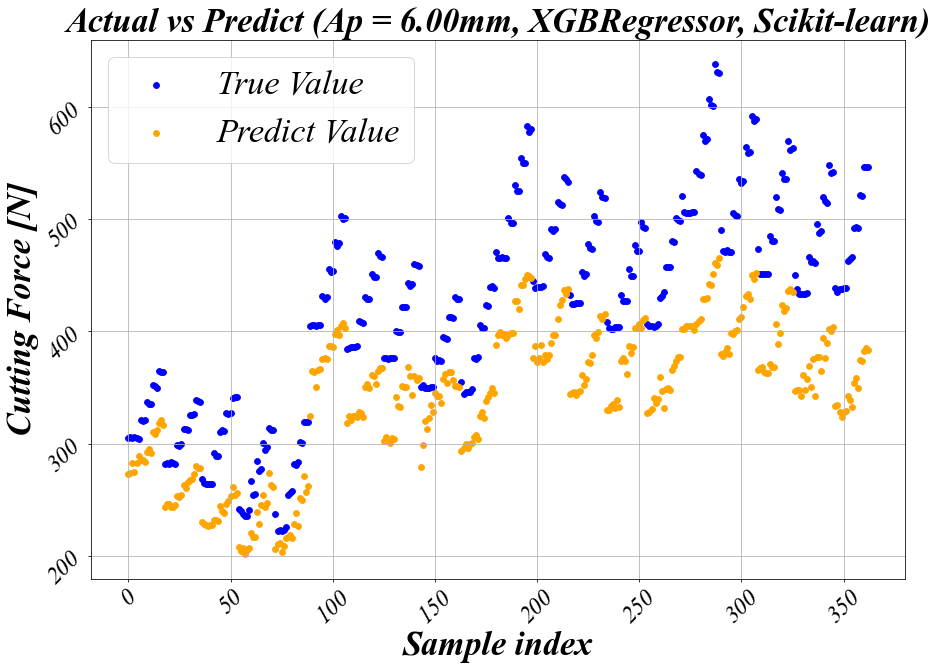

In [48]:
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig = plt.figure(figsize=(15,10),dpi=70)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 25
plt.rcParams['font.style'] = 'italic'
plt.title('Actual vs Predict (Ap = 6.00mm, XGBRegressor, Scikit-learn)',**tfont)
plt.scatter(range(0, len(y_test)), y_test, label='True Value', color = 'blue')
#plt.ylim((0,300))
plt.scatter(range(0, len(XGB_test_pred)), XGB_test_pred, label='Predict Value', color = 'orange')
plt.xlabel(r'Sample index',**lfont)
plt.ylabel(r'Cutting Force [N]',**lfont)
plt.tick_params(labelrotation=45, labelsize=25)
plt.grid()
plt.legend(fontsize = 35)
plt.show()
#fig.savefig("Bi-directional LSTM Prediction.svg")

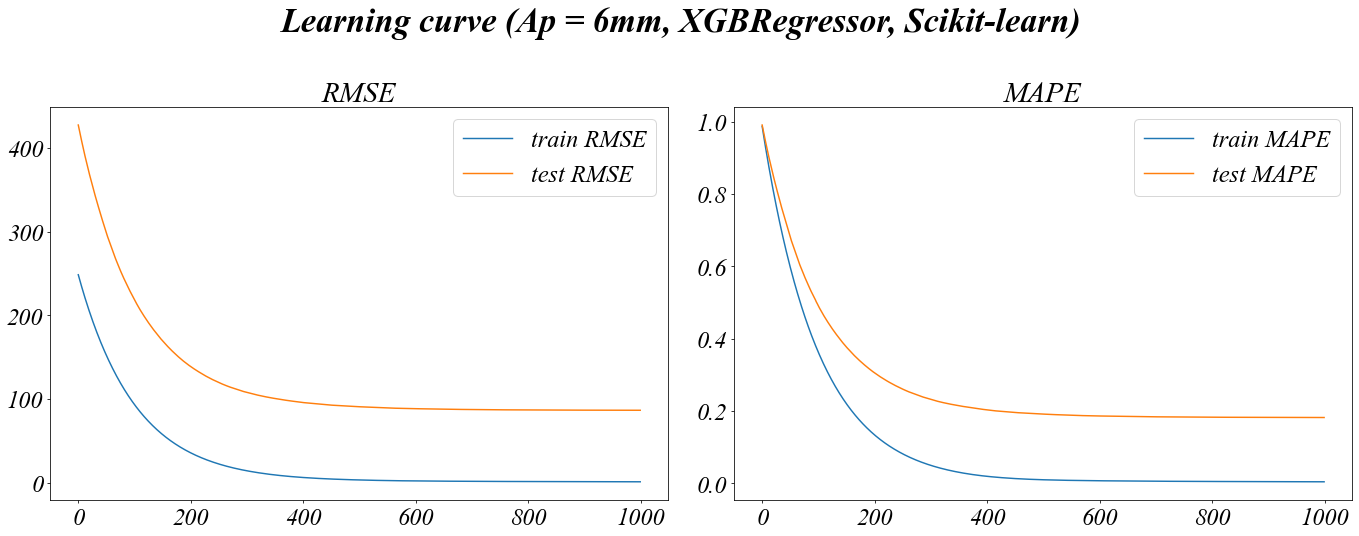

In [49]:
results = xgb.evals_result() # 학습 결과 가져오기


train_rmse = results['validation_0']['rmse']
test_rmse = results['validation_1']['rmse']

train_mape = results['validation_0']['mape']
test_mape = results['validation_1']['mape']

#학습곡선 그리기
tfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

lfont={'fontname':'Times New Roman',
     'fontsize':35,
     'style':'italic',
     'fontweight':'bold'}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8),dpi=70)

ax[0].set_title("RMSE")
ax[1].set_title("MAPE")

ax[0].plot(train_rmse, label='train RMSE')
ax[0].plot(test_rmse, label='test RMSE')
ax[0].legend()

ax[1].plot(train_mape, label='train MAPE')
ax[1].plot(test_mape, label='test MAPE')
ax[1].legend()

fig.suptitle('Learning curve (Ap = 6mm, XGBRegressor, Scikit-learn)',**tfont)
fig.tight_layout() # 사용하면 플롯간 여백을 조정해준다. 
plt.show()
fig.savefig("./plot/Learning curve Ap 6mm_12800.png")